# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings

from scipy import stats as stats
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
 
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Load Data

In [ ]:
path = 'https://raw.githubusercontent.com/CharismaJuniK/File/main/CsSegmentation.csv'
dfraw = pd.read_csv(path, sep=',')
df = dfraw.copy()
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


* The classification target is the Segmentation column with object data type

* The other column is feature

## Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df.shape

(8068, 11)

* The dataframe has a total of 8068 rows and 10 columns

Based on above information, we can separate the categorical and numerical columns as follows:

### Distinguish between Categorical and Numerical Data

In the machine learning world, data is nearly always split into two groups: numerical and categorical. Numerical data is used to mean anything represented by numbers (floating point or integer). Categorical data generally means everything else and in particular discrete labeled groups are often called out.

In [ ]:
# Membedakan data categorical dan numeric
num_dtypes=['int64','float64']
cat_dtypes=['object']

num_df = df.select_dtypes(include = num_dtypes)
cat_df = df.select_dtypes(include = cat_dtypes)
numericals = num_df.columns[1:] # Exclude column ID
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['Age', 'Work_Experience', 'Family_Size'], dtype='object')
Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')


### Unique Value Counting

To find out if there is a unique value.

In [ ]:
# Value Counting
for col in df.columns:
  print('Values pada kolom {}:'.format(col))
  print(df[col].unique())
  print()

Values pada kolom ID:
[462809 462643 466315 ... 465406 467299 461879]

Values pada kolom Gender:
['Male' 'Female']

Values pada kolom Ever_Married:
['No' 'Yes' nan]

Values pada kolom Age:
[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]

Values pada kolom Graduated:
['No' 'Yes' nan]

Values pada kolom Profession:
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]

Values pada kolom Work_Experience:
[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]

Values pada kolom Spending_Score:
['Low' 'Average' 'High']

Values pada kolom Family_Size:
[ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]

Values pada kolom Var_1:
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']

Values pada kolom Segmentation:
['D' 'A' 'B' 'C']



* The dataframe has null values ​​in columns, such as : Ever_Married, Graduated, Profession, Work_Experience, Family_Size, Var_1
* No 'dirty' values ​​were found,e.g: there were additional special characters or spaces but the data contained 'nan'

## Numericals

### Univariate Analysis

Used to view some basic statistical details 

In [ ]:
df[numericals].describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


#### Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

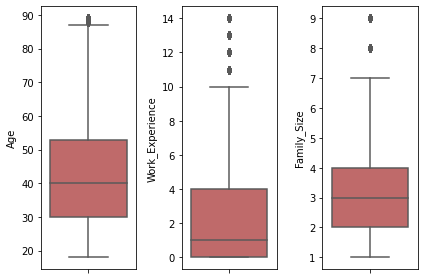

In [ ]:
for col in range(0, len(numericals)):
    plt.subplot(1, len(numericals), col+1)
    sns.boxplot(y=df[numericals[col]], color='indianred', orient='v')
    plt.tight_layout()

* When the median is in the middle of the box, and the whiskers are about the same on both sides of the box, then the distribution is symmetric.

* When the median is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box, then the distribution is positively skewed (skewed right).

* When the median is closer to the top of the box, and if the whisker is shorter on the upper end of the box, then the distribution is negatively skewed (skewed left).

So the data of Age, Work_Experience, and Family_Size are positively skewed (skewed right)

#### Distplot

The distplot represents the univariate distribution of data

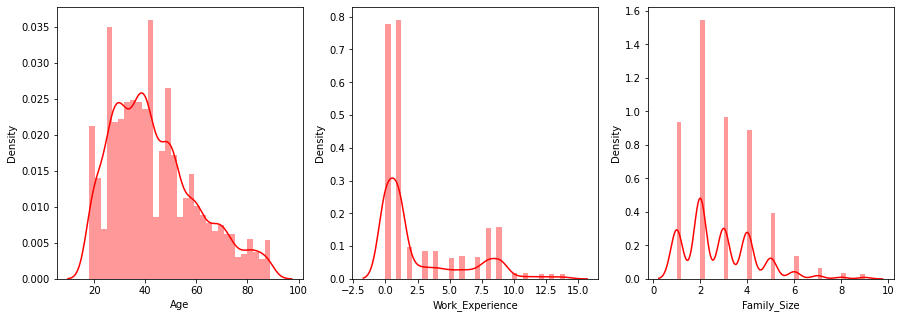

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.distplot(df[numericals[i]], color='red')

Based on the plot above, it can be seen that the three numerical data are positively skewed.

### Multivariate Analysis

#### Heatmap

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. When two independent features have a strong relationship they are considered either positively or negatively correlated.  

Based on this heatmap,
* The correlation between Work_Experience and Age is -0.19
* The correlation between Work_Experience and Family_Size is -0.06
* The correlation between Age and Family_Size is -0.28

It means that those variables are more weakly correlated(negatively correlated) 

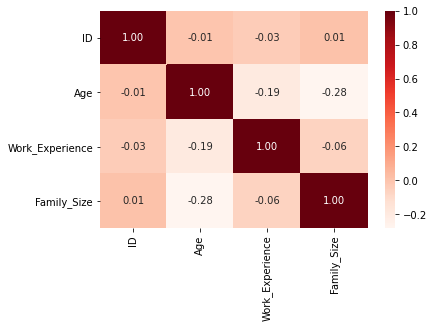

In [ ]:
plt.figsize=((10,8))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f')
warnings.filterwarnings("ignore")

#### Pairplot

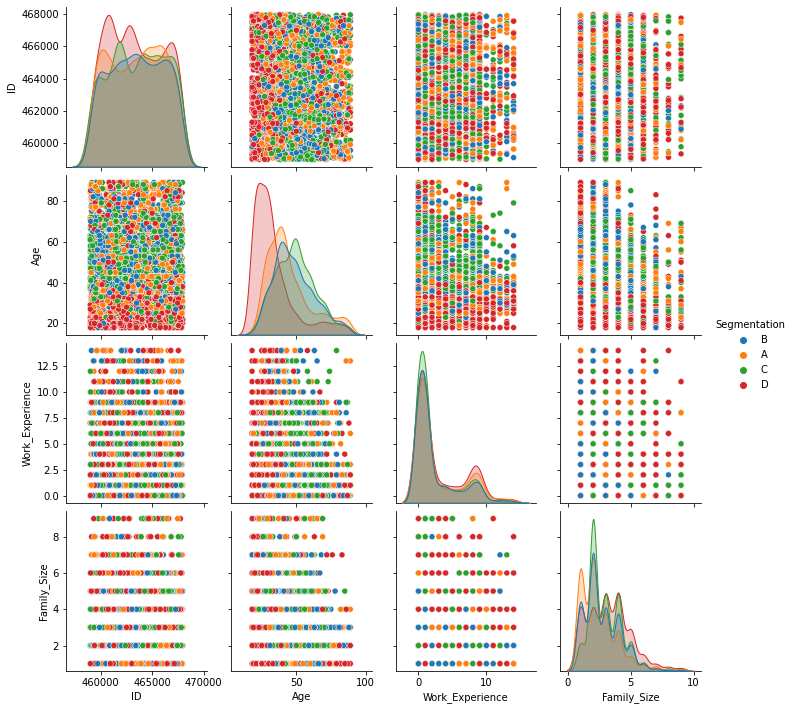

In [ ]:
plt.figsize=((10,10))
sns.pairplot(df[2:], diag_kind='kde',hue='Segmentation')
warnings.filterwarnings("ignore")

Now we see that the relationship of Age with other numerical features can explain the cluster well. It looks like the plot colors are quite well divided.

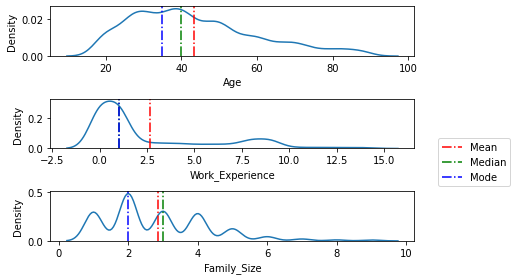

In [ ]:
for i in range(0, len(numericals)):
    plt.subplot(3, len(numericals)/2, i+1)
    mean=df[numericals[i]].mean()
    median=df[numericals[i]].median()
    mode=df[numericals[i]].mode().values[0]
    sns.distplot(df[numericals[i]],hist=False)
    plt.axvline(mean, color='r', linestyle='-.', label="Mean")
    plt.axvline(median, color='g', linestyle='-.', label="Median")
    plt.axvline(mode, color='b', linestyle='-.', label="Mode")
    plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1),loc='lower left')
plt.show()

Based on the above of data, we get conclusion:

* All data numericals do not have unnatural values, still within a reasonable range for each data.
* The mean and median data for all data are relatively close.
* The Age and Work_Experience column data have mean > median, so based on the data above, it can be concluded as positively skewed.
* Generally, Family_Size data has a mean < median is usually negatively skewed but based on the plot, it can be seen that the three data are positively skewed. This shows that not all datasets with mean < median are negatively skewed.

The IQR is used to measure how spread out the data points in a set are from the mean of the data set. The higher the IQR, the more spread out the data points; in contrast, the smaller the IQR, the more bunched up the data points are around the mean.

In [ ]:
# count outlier:
Q1 = df[numericals].quantile(0.25)
Q3 = df[numericals].quantile(0.75)
IQR = Q3 - Q1 # Inter quartile range (IQR)

print('Total Outliers:')
((df[numericals] < (Q1 - 1.5 * IQR)) | (df[numericals] > (Q3 + 1.5 * IQR))).sum()

Total Outliers:


Age                 71
Work_Experience    189
Family_Size         94
dtype: int64

## Categoricals

### Univariate Analysis

Used to view some basic statistical details

In [ ]:
df[categoricals].describe()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


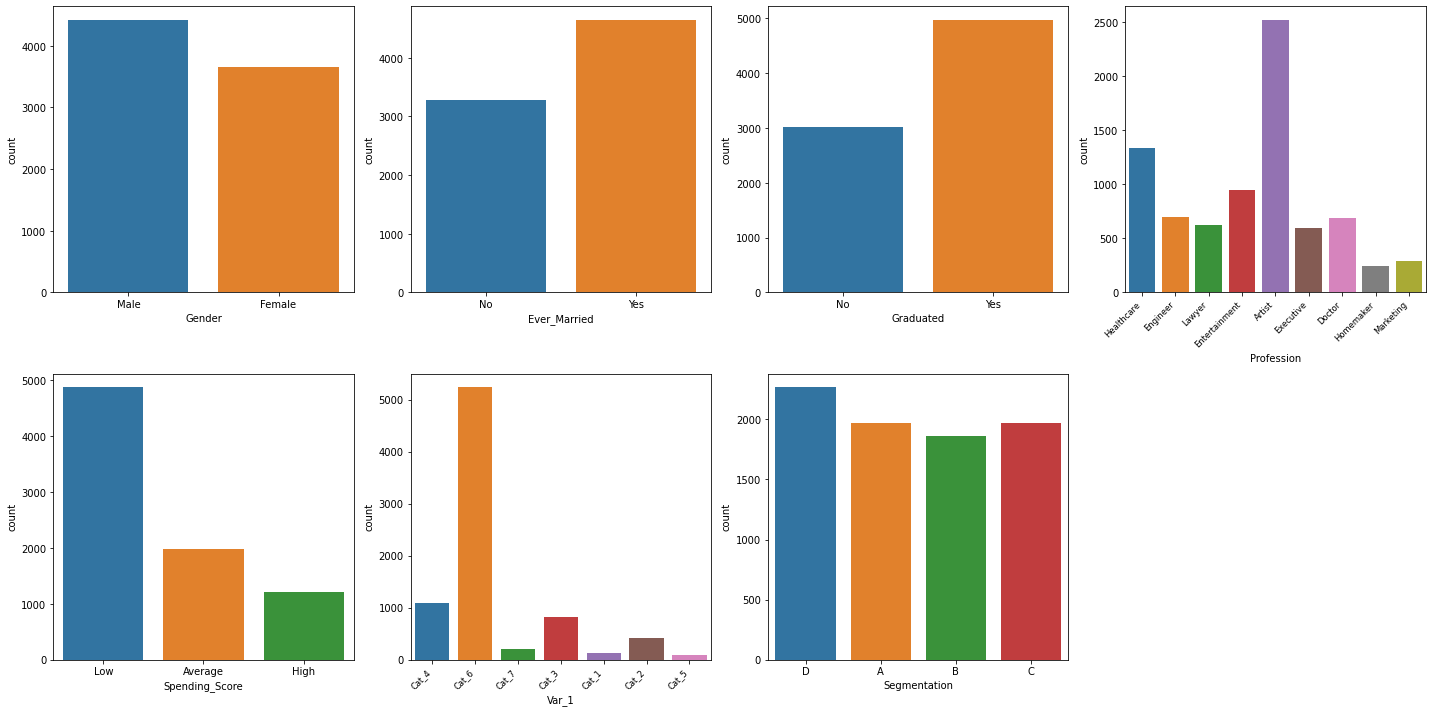

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0, len(categoricals)):
    plt.subplot(2, round(len(categoricals)/2,0), i+1)
    if i+1 in (4,6):
      sns.countplot(df[categoricals[i]], orient='v')
      plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
)
    else:
       sns.countplot(df[categoricals[i]], orient='v')
    plt.tight_layout()

* Based on the unique value and the highest data frequency. It can be concluded that the column, such as Gender, Ever_Married, Graduated, and Segmentation are relatively balanced.
* Based on the unique value and the highest data frequency. It can be concluded that the column, such as Profession, Spending_Score, and Var_1 are imbalance in the amount of data in these columns.

### Univariate Analysis with Target Data

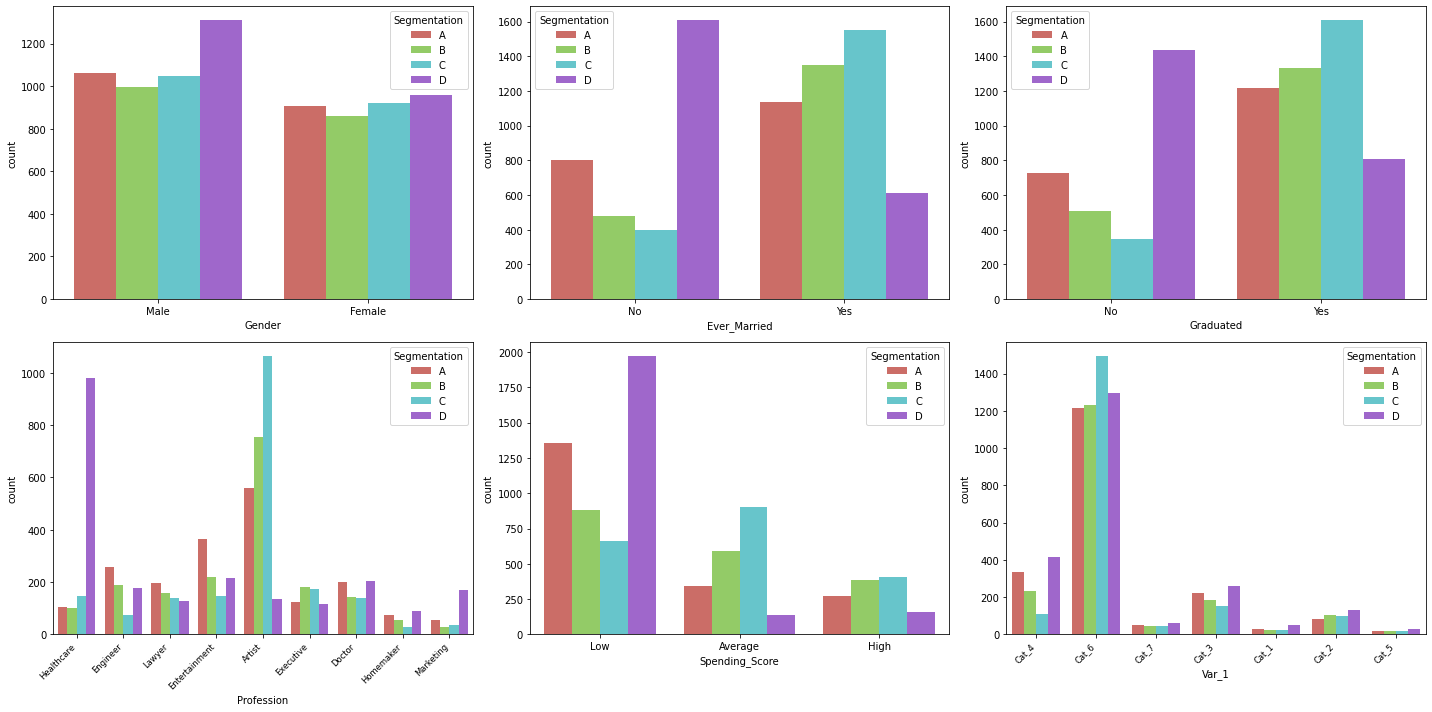

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0, len(categoricals)-1):
    plt.subplot(2, round((len(categoricals)-1)/2,0), i+1)
    if i+1 in (4,6):
      sns.countplot(x=categoricals[i],hue='Segmentation', hue_order=['A', 'B', 'C', 'D'], data=df[categoricals], palette='hls', orient='v')
      plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
)
    else:
       sns.countplot(x=categoricals[i],hue='Segmentation', hue_order=['A', 'B', 'C', 'D'], data=df[categoricals], palette='hls', orient='v')
    plt.tight_layout()

**Insight:**

* Mostly Gender Male in segment D and Gender Female in segment C & D
* Mostly Customer that Ever_Married in segment C and not Ever_Married in segment D
* Mostly Customer that Graduated in segment C and not graduated in segment D
* Profession healthcare dominates in segment D, artist in segment C, and Entertainment in segment A
* Spending Score customers who are low in most of the segment D
* Customers with category 6 (cat6) are mostly included in segment C

### Multivariate Analysis

#### Stripplot

The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). But in this case, I show the striplot only to show the coding of striplot and just for practice.

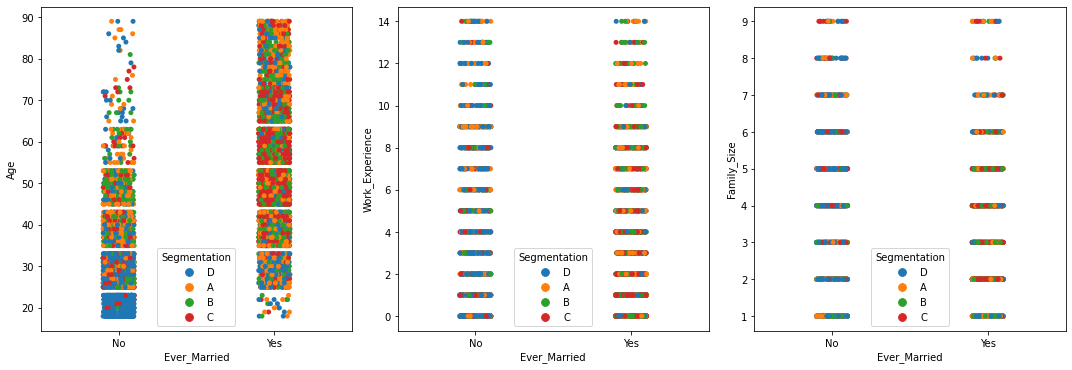

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): 
  ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
  sns.stripplot(ax=ax, data=df, x='Ever_Married', y=numericals[i],hue=df['Segmentation']) # gambar catplot/stripplotnya
  plt.tight_layout() # layout

  if i != 0: plt.close(i+1) # close figure 

  plt.close(len(numericals) + 1) # close figure 

There is no significant correlation between gender and numerical data (age, work experience, and family size)

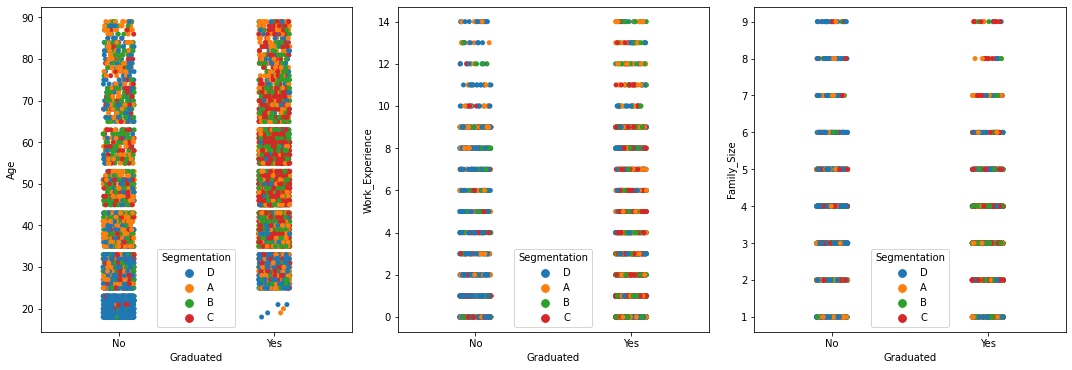

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): 
  ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
  sns.stripplot(ax=ax, data=df, x='Graduated', y=numericals[i],hue=df['Segmentation']) # gambar catplot/stripplotnya
  plt.tight_layout() # layout

  if i != 0: plt.close(i+1) # close figure 

  plt.close(len(numericals) + 1) # close figure 

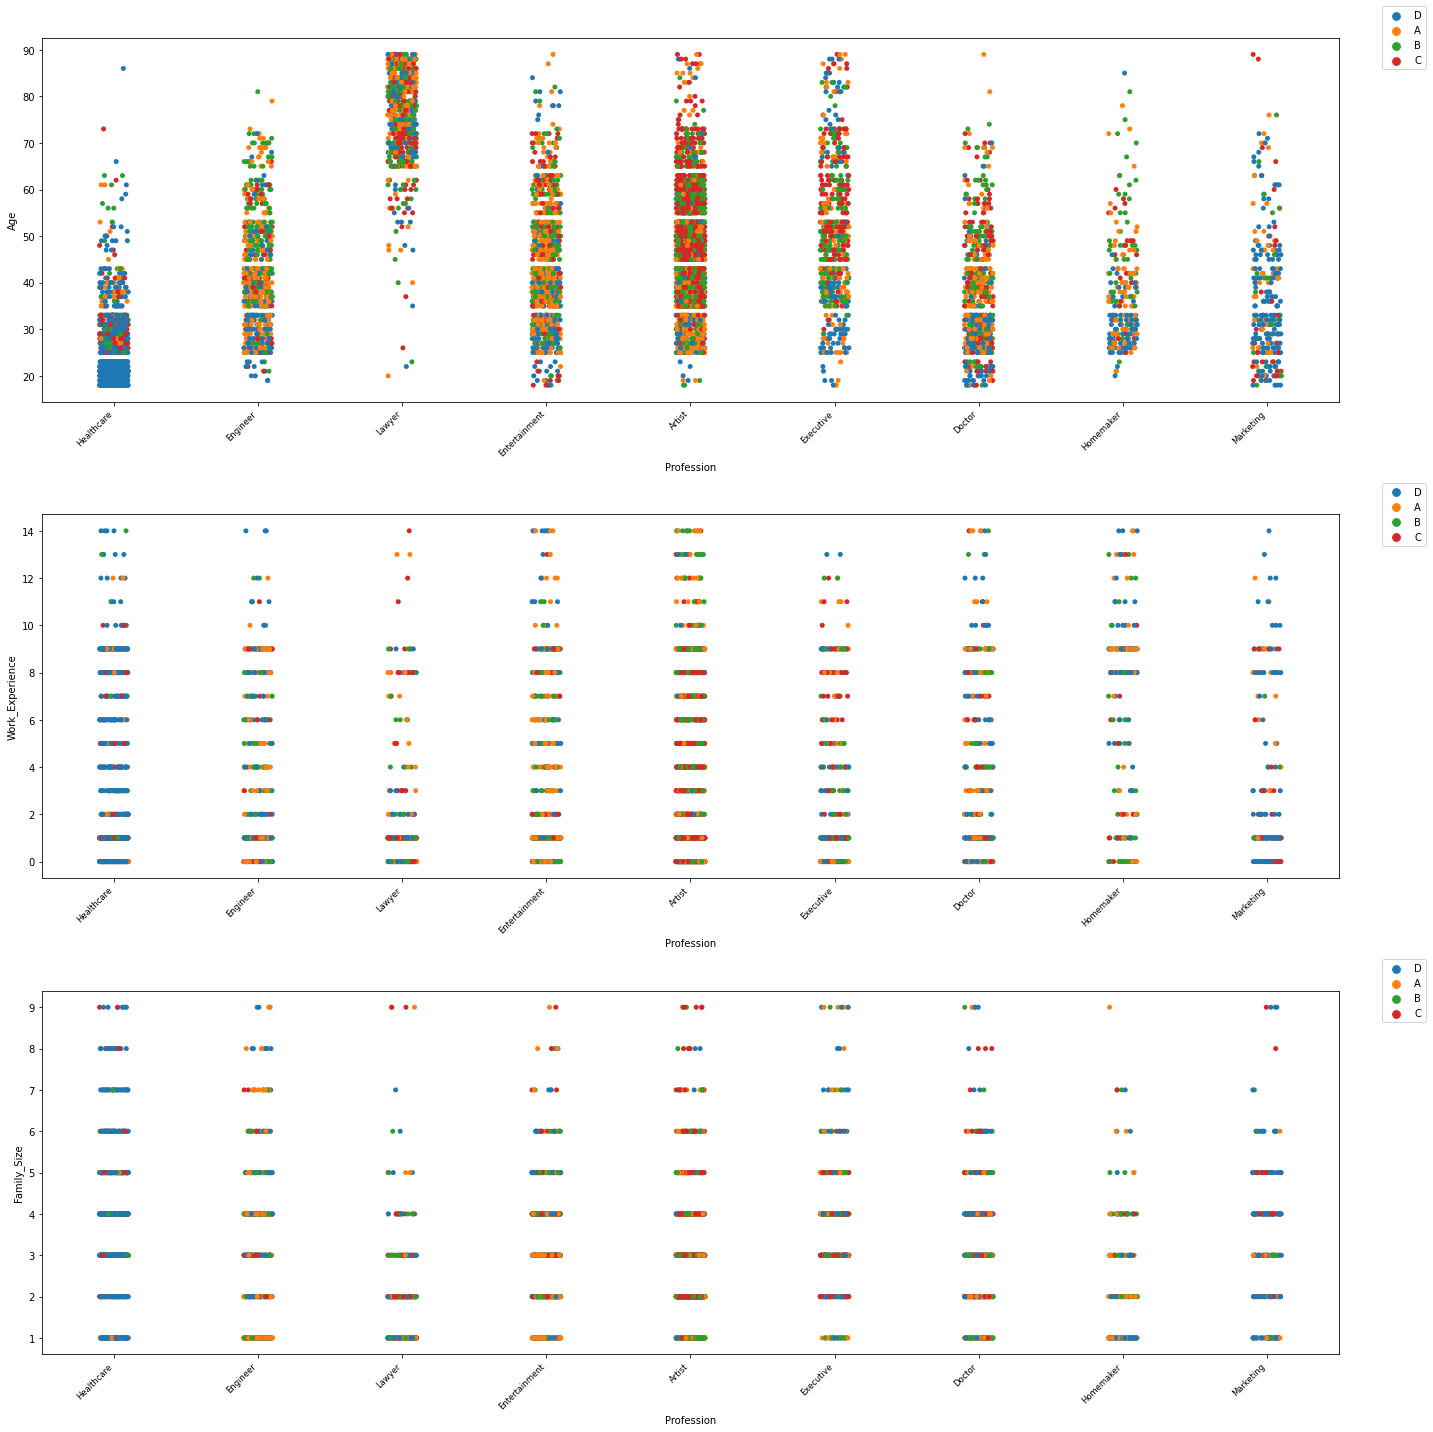

In [ ]:
fig = plt.figure(figsize=(20, 20))
for i in range(0, len(numericals)): 
  ax = fig.add_subplot(3, 1, i+1) # kita set posisi catplot/stripplotnya di layout
  sns.stripplot(ax=ax, data=df, x='Profession', y=numericals[i],hue=df['Segmentation']) # gambar catplot/stripplotnya
  plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small' ) 
  plt.tight_layout() # layout

  if i != 0: plt.close(i+1) # close figure 

  plt.close(len(numericals) + 1) # close figure 
  plt.legend(bbox_to_anchor=(1.05, 1),loc='center')

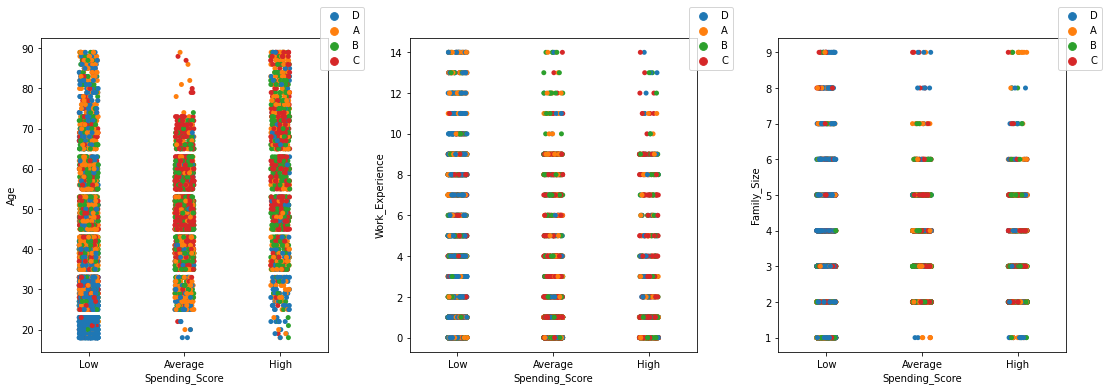

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): 
  ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
  sns.stripplot(ax=ax, data=df, x='Spending_Score', y=numericals[i],hue=df['Segmentation']) # gambar catplot/stripplotnya
  plt.tight_layout() # layout

  if i != 0: plt.close(i+1) # close figure 

  plt.close(len(numericals) + 1) # close figure 
  plt.legend(bbox_to_anchor=(1.05, 1),loc='center')

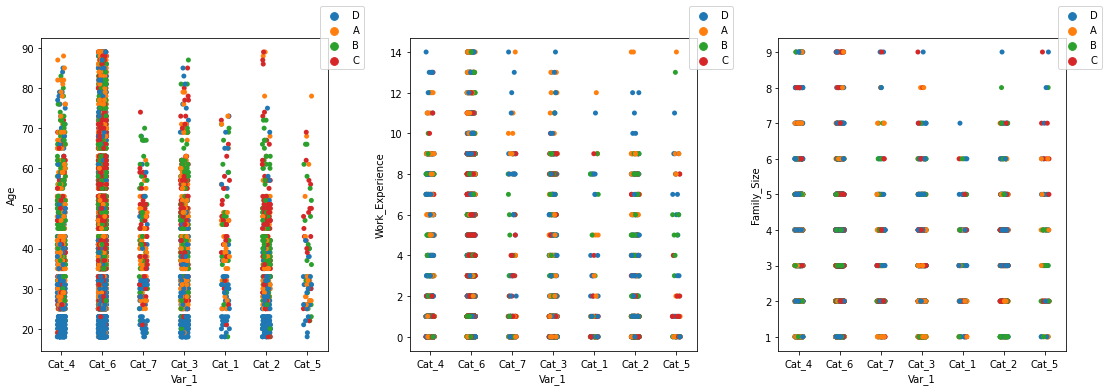

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): 
  ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
  sns.stripplot(ax=ax, data=df, x='Var_1', y=numericals[i],hue=df['Segmentation']) # gambar catplot/stripplotnya
  plt.tight_layout() # layout

  if i != 0: plt.close(i+1) # close figure 

  plt.close(len(numericals) + 1) # close figure 
  plt.legend(bbox_to_anchor=(1.05, 1),loc='center')

The relationship between segments to categorical and numerical data is clearly seen in the Age feature. Now see that at the age of 20-25 the majority of the segmentation is dominated by segment D.

#### Categorical Heatmap

Calculation of correlation categorical data by calculating Cramer's V

In [ ]:
datacat = df[categoricals]

for i in datacat.columns:
  datacat[i].fillna('Null Value',inplace=True)#replace 'nan' with 'Nun Value' in categoricals data

datacat.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A


In [ ]:
# Encode target data into numerical
data_encoded = datacat.copy()

for i in datacat.columns :
  data_encoded[i] = LabelEncoder().fit_transform(datacat[i])
  
data_encoded

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,1,0,0,5,2,3,3
1,0,2,2,2,0,3,0
2,0,2,2,2,2,5,1
3,1,2,2,7,1,5,1
4,0,2,2,3,1,5,0
...,...,...,...,...,...,...,...
8063,1,0,0,9,2,0,3
8064,1,0,0,4,2,3,3
8065,0,0,2,5,2,5,3
8066,0,0,2,5,2,5,1


Cramér’s V is a number between 0 and 1 that indicates how strongly two categorical variables are associated.
* V∈[0.1,0.3]: weak association
* V∈[0.4,0.5]: medium association
* V>0.5: strong association

In [ ]:
def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Menghitung total data per kolom dan row
    chi2 = stats.chi2_contingency(crosstab)[0] # Mengambil hasil Chi2 test
    n = np.sum(crosstab) # Total data observation
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
res = pd.DataFrame(cramers_results, columns = data_encoded.columns, index = data_encoded.columns)

res

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
Gender,1.00,0.12,0.03,0.36,0.06,0.04,0.03
Ever_Married,0.12,1.00,0.14,0.36,0.47,0.08,0.30
Graduated,0.03,0.14,1.00,0.29,0.11,0.16,0.26
Profession,0.36,0.36,0.29,1.00,0.44,0.10,0.33
Spending_Score,0.06,0.47,0.11,0.44,1.00,0.07,0.31
Var_1,0.04,0.08,0.16,0.10,0.07,1.00,0.10
Segmentation,0.03,0.30,0.26,0.33,0.31,0.10,1.00


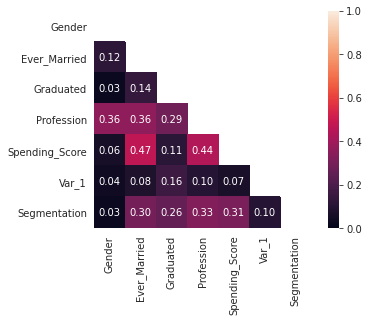

In [ ]:
mask = np.zeros_like(res, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(res, mask=mask, vmin=0., vmax=1, square=True, annot=True, fmt='.2f')

plt.show()

Based on Categorical Heatmap, we see that only Spending_Score and Ever_Married exhibited a medium association, while the other data sets, albeit significant, exhibited weak association and no association.

## Checking Missing Value

In [ ]:
print ("Number of Missing Data per column:")
df.isna().sum()

Number of Missing Data per column:


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

The dataframe still has missing values ​​in the columns Ever_Married = 140, Graduated = 78, Profession = 124, Work_Experience = 829, Family_Size = 335, Var_1 = 76

In [ ]:
tab = df.columns
table = pd.DataFrame(tab)

nullrate = []
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    nullrate.append(null_rate)

table['Null Rate'] = nullrate

table.columns = ['Column', 'Null Rate']
table

,Column,Null Rate
0,ID,0.000000
1,Gender,0.000000
2,Ever_Married,1.735250
3,Age,0.000000
4,Graduated,0.966782
5,Profession,1.536936
6,Work_Experience,10.275161
7,Spending_Score,0.000000
8,Family_Size,4.152206
9,Var_1,0.941993


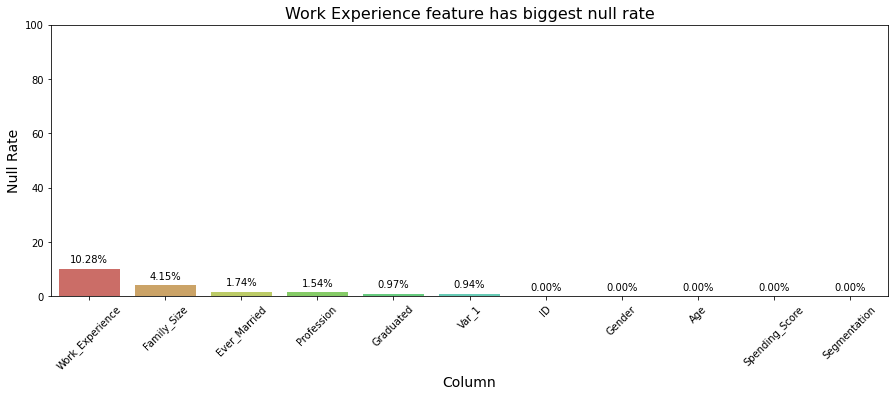

In [ ]:
table = table.sort_values(by='Null Rate', ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(x='Column', y='Null Rate', data = table, palette="hls")
ax.set_title('Work Experience feature has biggest null rate', fontsize = 16)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(ylim=(0, 100))
plt.xlabel('Column', fontsize = 14)
plt.xticks(rotation=45)
plt.ylabel('Null Rate', fontsize = 14)
warnings.filterwarnings("ignore")

All temporary blank categorical data are filled with labels to indicate their significance to the whole dataset.

In [ ]:
dftransit = dfraw.copy()
for i in dftransit.columns:
    if i in categoricals:
        dftransit[i].fillna('Null Value',inplace=True)#replace 'nan' with 'Nun Value' in dfraw(data mentah)
    else:
        pass

dftransit.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### Numerical Missing Value

#### Work_Experience

In [ ]:
dfworkexp = dftransit[['Work_Experience']]
dfworkexp['is_nan'] = np.where(dfworkexp['Work_Experience'].isna(), 'Yes', 'No')
dfworkexpgr = dfworkexp['is_nan'].value_counts().reset_index()
dfworkexpgr['Percentage'] = round(dfworkexpgr['is_nan']*100/dfworkexpgr['is_nan'].sum(),2)
dfworkexpgr.columns = ['Missing Work Experience Data', 'is_Nan', 'Percentage']
dfworkexpgr

,Missing Work Experience Data,is_Nan,Percentage
0,No,7239,89.72
1,Yes,829,10.28


Work_Experience has 829 missing values (10.28%)

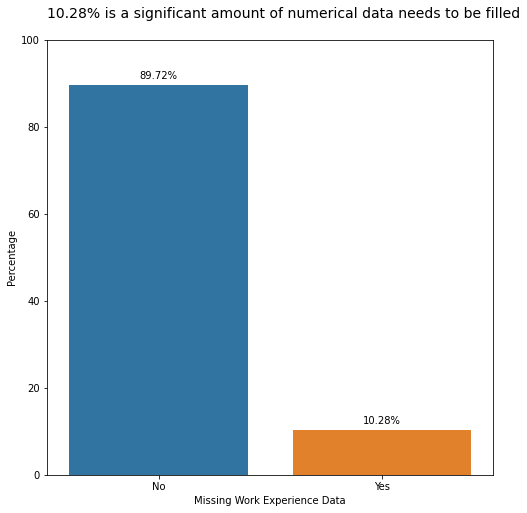

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True)
ax = sns.barplot(x=dfworkexpgr['Missing Work Experience Data'], y=dfworkexpgr['Percentage'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(xlabel='Missing Work Experience Data', ylabel='Percentage')
plt.text(-0.5, 105, '10.28% is a significant amount of numerical data needs to be filled', style = 'normal', fontsize=14)
ax.set(ylim=(0, 100))

warnings.filterwarnings("ignore")

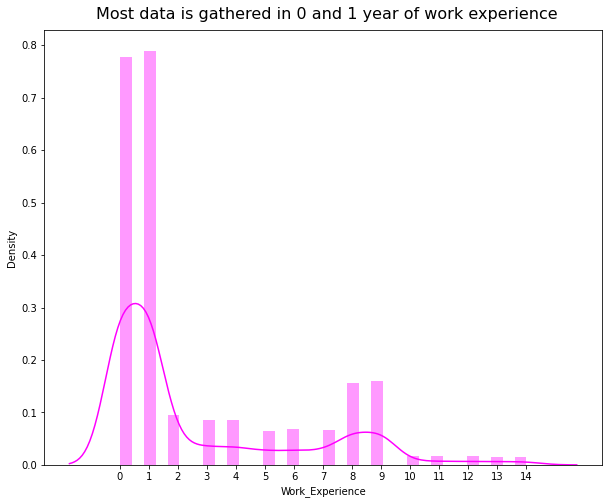

In [ ]:
plt.figure(figsize=(10,8))
list_ = [x for x in range(0, 15)]
sns.distplot(dftransit['Work_Experience'], color='magenta')
plt.xticks(list_)
plt.text(-0.8, 0.85, 'Most data is gathered in 0 and 1 year of work experience', style = 'normal', fontsize=16)
warnings.filterwarnings("ignore")


The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [ ]:
dftransit['Work_Experience'].skew()

1.3062257604935081

Work Experience data are highly skewed.

#### Family_Size

In [ ]:
dffams = dftransit[['Family_Size']]
dffams['is_nan'] = np.where(dffams['Family_Size'].isna(), 'Yes', 'No')
dffamsgr = dffams['is_nan'].value_counts().reset_index()
dffamsgr['Percentage'] = round(dffamsgr['is_nan']*100/dffamsgr['is_nan'].sum(),2)
dffamsgr.columns = ['Missing Family Size Data', 'is_Nan', 'Percentage']
dffamsgr

,Missing Family Size Data,is_Nan,Percentage
0,No,7733,95.85
1,Yes,335,4.15


Family-Size has 335 missing values (4.15%)

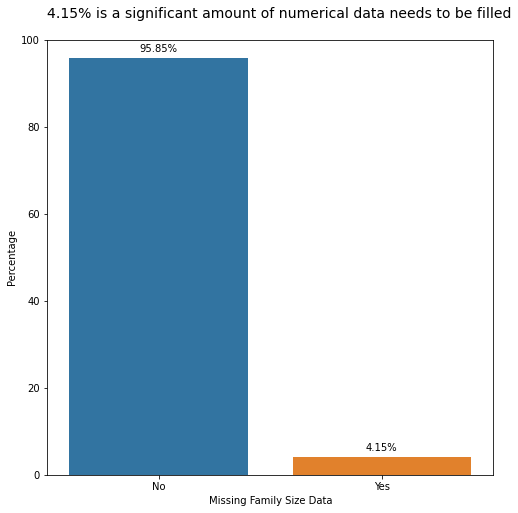

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True)
ax = sns.barplot(x=dffamsgr['Missing Family Size Data'], y=dffamsgr['Percentage'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(xlabel='Missing Family Size Data', ylabel='Percentage')
plt.text(-0.5, 105, '4.15% is a significant amount of numerical data needs to be filled', style = 'normal', fontsize=14)
ax.set(ylim=(0, 100))

warnings.filterwarnings("ignore")

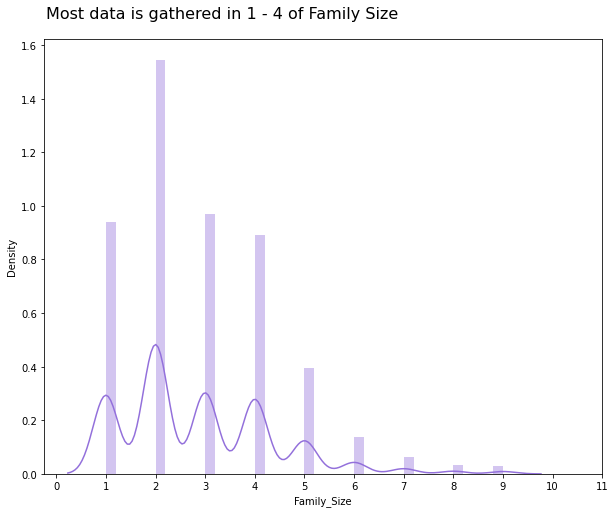

In [ ]:
plt.figure(figsize=(10,8))
list_ = [x for x in range(0, 12)]
sns.distplot(dftransit['Family_Size'], color='mediumpurple')
plt.xticks(list_)
plt.text(-0.2, 1.7, 'Most data is gathered in 1 - 4 of Family Size', style = 'normal', fontsize=16)
warnings.filterwarnings("ignore")

In [ ]:
print("Column skewness = %.2f" % (df["Family_Size"].skew()))

Column skewness = 1.01


Family_Size data are highly skewed.

### Categorical Missing Value

#### Ever_Married

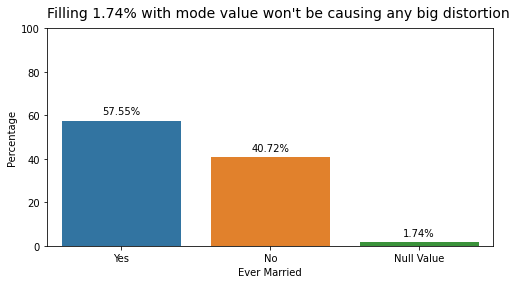

In [ ]:
Ever_Married = dftransit['Ever_Married'].value_counts()*100 / len(dftransit.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharey=True)
ax = sns.barplot(x=Ever_Married.index, y=Ever_Married.values)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(xlabel='Ever Married', ylabel='Percentage')
plt.text(-0.5, 105, 'Filling 1.74% with mode value won\'t be causing any big distortion', style = 'normal', fontsize=14)
ax.set(ylim=(0, 100))

warnings.filterwarnings("ignore")

#### Graduated

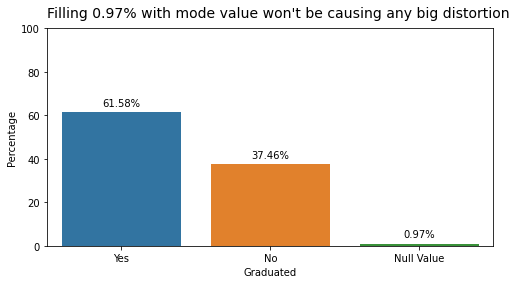

In [ ]:
Graduated = dftransit['Graduated'].value_counts()*100 / len(dftransit.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharey=True)
ax = sns.barplot(x=Graduated.index, y=Graduated.values)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(xlabel='Graduated', ylabel='Percentage')
plt.text(-0.5, 105, 'Filling 0.97% with mode value won\'t be causing any big distortion', style = 'normal', fontsize=14)
ax.set(ylim=(0, 100))

warnings.filterwarnings("ignore")

#### Profession

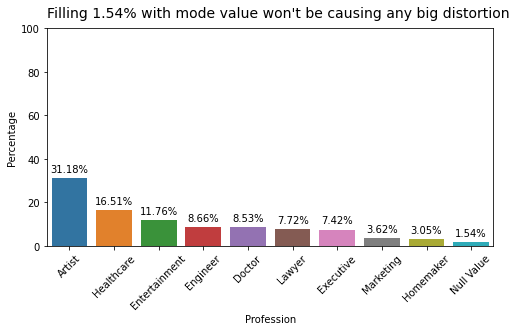

In [ ]:
Profession = dftransit['Profession'].value_counts()*100 / len(dftransit.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharey=True)
ax = sns.barplot(x=Profession.index, y=Profession.values)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(xlabel='Profession', ylabel='Percentage')
plt.text(-0.5, 105, 'Filling 1.54% with mode value won\'t be causing any big distortion', style = 'normal', fontsize=14)
plt.xticks(rotation=45)
ax.set(ylim=(0, 100))

warnings.filterwarnings("ignore")

#### Var_1

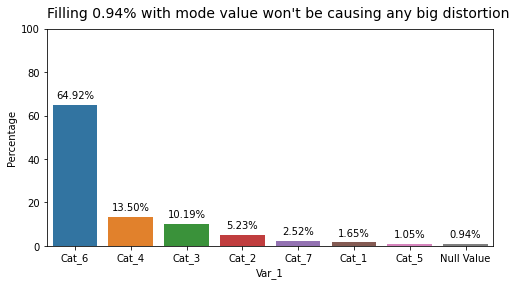

In [ ]:
Var_1 = dftransit['Var_1'].value_counts()*100 / len(dftransit.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharey=True)
ax = sns.barplot(x=Var_1.index, y=Var_1.values)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(xlabel='Var_1', ylabel='Percentage')
plt.text(-0.5, 105, 'Filling 0.94% with mode value won\'t be causing any big distortion', style = 'normal', fontsize=14)
ax.set(ylim=(0, 100))

warnings.filterwarnings("ignore")

## Checking Duplicate Values

In [ ]:
df.duplicated().sum()

0

There is no duplicate data from all columns in the dataset.

In [ ]:
df.duplicated(subset=['ID']).sum()

0

In [ ]:
df.duplicated(subset=df.columns[1:-1]).sum()

734

In [ ]:
df.duplicated(subset=df.columns[1:]).sum()

417

Even though the ID is different, there are some data that are the same. This is not a problem, because it could be that the similarities are due to coincidence

## Checking Target Imbalance

In [ ]:
df.groupby(['Segmentation']).Gender.agg('count')

Segmentation
A    1972
B    1858
C    1970
D    2268
Name: Gender, dtype: int64

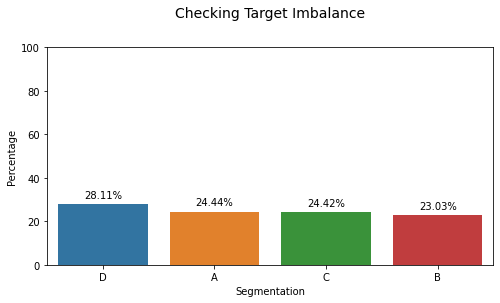

In [ ]:
Segmentation = dftransit['Segmentation'].value_counts()*100 / len(dftransit.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharey=True)
ax = sns.barplot(x=Segmentation.index, y=Segmentation.values)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(xlabel='Segmentation', ylabel='Percentage')
plt.title('Checking Target Imbalance', loc='center',pad=30, fontsize=14, color='black')
#plt.text(-0.5, 105, 'Checking Target Imbalance', style = 'normal', fontsize=14)
ax.set(ylim=(0, 100))

warnings.filterwarnings("ignore")

## **EDA Conclussion**

* The results of dataframe df conclude that the data per column is filled according to its context (example: Profession is filled with profession data, not other data outside of that)
* More features are filled by categorical type variables. Furthermore, for modeling, you can choose a model that can read categorical data well or you can do variable encoding so that the data becomes numerical
* Some features of numeric type have skewed data. Handling needs to be done.
* Missing data (Nan) exists in several columns, both categorical and numerical features. Will be imputed (more detail in the Imputation section)
* Target data is balanced (no inequality)
* Numerical features are not linearly correlated. This is contextually quite odd, for example, age does not correlate with work experience
* Some features combine well in a certain range (e.g. the combination of age 20-25 with healthcare jobs grouping all customers into segment D)

# Data Cleansing

## Opsi 1: Drop data with missing value

In [ ]:
df[df.isna().any(axis=1)].shape

(1403, 11)

From 8068 data, 1403 rows have missing values. With such a large proportion, deleting all the rows is not the best option that can be done.

## Opsi 2: Imputation

### Checking Data with Nan Value

In [ ]:
#check data numerical atau categorical yang blank
nan=df.columns[df.isna().any()].tolist()

nan_cat=[]
nan_num= []
for i in nan:
  if i in categoricals:
    nan_cat.append (i)
  else:
    nan_num.append (i)

print('nan categorical:',nan_cat)
print('nan numerical:',nan_num)

nan categorical: ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
nan numerical: ['Work_Experience', 'Family_Size']


### Mode Imputation

In [ ]:
for i in nan_cat:
  df[i].fillna(df[i].mode()[0],inplace=True)

doing imputation with the mode value of each categorical data with the small consideration that the proportion of null data in each of these data is considered not to create significant distortions to the overall data distribution. The Work_Experience data will be imputed updated with the code in Ratio-Based Imputation.

### Median Imputation

In [ ]:
for i in ['Family_Size','Age']:
  df[i].fillna(df[i].median(),inplace=True)

From some of the plots of checking results above, it can be seen that all numerical data has a skew distribution so that it is decided that all nulls are imputed with the median value.

### Ratio Imputation

For the Work experience column data, the data is concentrated in 0 and 1 year, with a value of 10.28%. If we fill in the data nan with only the median number (median=1). So it is feared that there will be distortion in the distribution, therefore it is chosen to fill in the nan in the work experience column with the numbers 0 and 1 proportionally

In [ ]:
work_0 = df[df['Work_Experience'] == 0]
work_1 = df[df['Work_Experience'] == 1]

ratio_0y = round(work_0.shape[0] / (work_0.shape[0] + work_1.shape[0]), 3)
ratio_1y = round(work_1.shape[0] / (work_0.shape[0] + work_1.shape[0]), 3)

print("Work 0 year ratio: ", ratio_0y)
print("Work 1 year ratio: ", ratio_1y)

Work 0 year ratio:  0.496
Work 1 year ratio:  0.504


In [ ]:
# fillna dengan mengisi angka 0 dan 1 secara proporsional pada kolom Work_experience
option = [0, 1]

df['Work_Experience'] = df['Work_Experience'].apply(lambda x: np.random.choice(option, p=[ratio_0y, ratio_1y]) \
                                                    if pd.isnull(x) else x)

### After Cleansing Checking

In [ ]:
#Percentage of Null value for each features
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    print("{}'s null rate :{}%".format(i,round(null_rate,2)))

ID's null rate :0.0%
Gender's null rate :0.0%
Ever_Married's null rate :0.0%
Age's null rate :0.0%
Graduated's null rate :0.0%
Profession's null rate :0.0%
Work_Experience's null rate :0.0%
Spending_Score's null rate :0.0%
Family_Size's null rate :0.0%
Var_1's null rate :0.0%
Segmentation's null rate :0.0%


### Check for Target Imbalance

In [ ]:
df.groupby(['Segmentation']).Gender.agg('count')

Segmentation
A    1972
B    1858
C    1970
D    2268
Name: Gender, dtype: int64

### Clean Data

In [ ]:
dfclean = df.copy()
dfclean

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Each segment is divided equally so that it can be concluded that the proportion of data is balance

## Data Encoding

### Categoricals

There are 2 encoding methods that can be used on categorical data: label encoding and one hot encoding. One hot encoding is used for all categorical data except spending scores.

Categorical data except spending scores do not have a special hierarchical relationship where one unique value is not bigger/smaller than the other unique values, so it is very suitable to use one hot encoding

while the spending score between unique values ​​has a hierarchical relationship, low < average < high so that label encoding can be done

#### Label Encoding

In [ ]:
# Label encoding untuk Spending_Score dan Target
replacer= {"Spending_Score":{"Low": 1, "Average": 2,"High":3}, "Segmentation":{"A": 1, "B": 2, "C": 3, "D": 4}}

In [ ]:
df = df.replace(replacer)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   int64  
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 693.5+ KB


#### One Hot Encoding

In [ ]:
# Dari list data categorical, keluarkan spending score dan segmentation (sudah diencode dengan label encoding)
categoricals1 = list(categoricals)
categoricals1.remove('Spending_Score')
categoricals1.remove('Segmentation')

categoricals1

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']

In [ ]:
# Lakukan One hot encoding

for col in categoricals1:
  df = pd.get_dummies(df, columns=[col], prefix=[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8068 non-null   int64  
 1   Age                       8068 non-null   int64  
 2   Work_Experience           8068 non-null   float64
 3   Spending_Score            8068 non-null   int64  
 4   Family_Size               8068 non-null   float64
 5   Segmentation              8068 non-null   int64  
 6   Gender_Female             8068 non-null   uint8  
 7   Gender_Male               8068 non-null   uint8  
 8   Ever_Married_No           8068 non-null   uint8  
 9   Ever_Married_Yes          8068 non-null   uint8  
 10  Graduated_No              8068 non-null   uint8  
 11  Graduated_Yes             8068 non-null   uint8  
 12  Profession_Artist         8068 non-null   uint8  
 13  Profession_Doctor         8068 non-null   uint8  
 14  Professi

In total, there are 26 features (excluding ID and Segmentation) that will be used for modeling

### Numericals

In [ ]:
X_raw_num = df[['Age', 'Work_Experience', 'Family_Size']]
X_raw_num.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,1.0,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,0.0,6.0


#### Outliers Handling

In [ ]:
#check skewness
for col in X_raw_num.columns:
    print("Column %s skewness = %.2f" % (col, X_raw_num[col].skew()))

Column Age skewness = 0.70
Column Work_Experience skewness = 1.46
Column Family_Size skewness = 1.02


In [ ]:
#Outlier percentage
for k, v in X_raw_num.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(X_raw_num)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Age outliers = 0.88%
Column Work_Experience outliers = 3.00%
Column Family_Size outliers = 2.35%


In [ ]:
# Family
q1 = X_raw_num['Family_Size'].quantile(0.25)
q3 = v.quantile(0.75)
irq = q3 - q1
print("Family Size Outlier")
print('Batas bawah: ', q1 - 1.5 * irq)
print('Batas atas: ', q3 + 1.5 * irq)

Family Size Outlier
Batas bawah:  -1.0
Batas atas:  7.0


Family size is an important thing in business decisions, removing people with family size 7 and above, actually eliminates target customers who are more likely to not suit a medium-sized car.

In [ ]:
aa = df[df['Age'] > 80]
aa['Segmentation'].value_counts()

1    111
2     70
4     58
3     58
Name: Segmentation, dtype: int64

Even for Age, you can see that old people still have patterns. Such as A, which is twice as much as C and D.

**Decision**

Decided not to remove the outliers, but a log transform was carried out so that the outliers disappeared while producing a more normal distribution in order to be able to use the model with the assumption of normality during modeling.

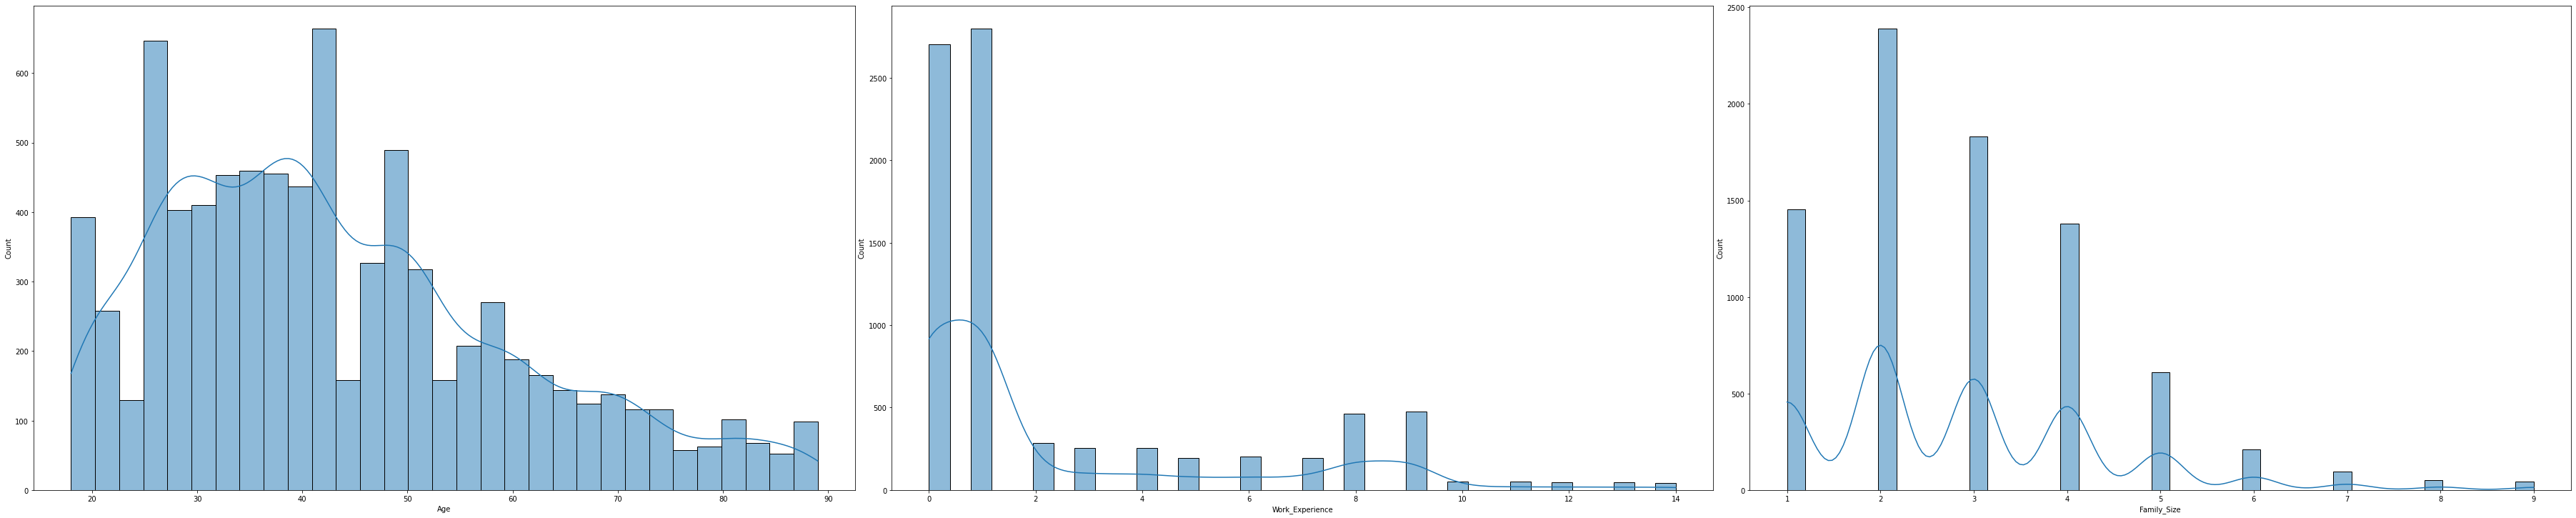

In [ ]:
# Plot the distribution graph
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(50, 10))
index = 0
axs = axs.flatten()
for k,v in df[numericals].items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Transform the skewed distribution
for col in df.columns:
    if col in numericals:
        if df[col].skew() > 0.5: # right skew, log
            df[col]= df[col].apply(lambda x: np.log1p(x))
            if df[col].skew() > 0.5: # right skew, log
                print ("Log twice: ", col, "  Because the skewness still %.2f" %(df[col].skew()))
                df[col]= df[col].apply(lambda x: np.log1p(x))
            else:
                print ("Log once: ", col)
    
df[numericals].head()

Log once:  Age
Log twice:  Work_Experience   Because the skewness still 0.66
Log once:  Family_Size


,Age,Work_Experience,Family_Size
0,3.135494,0.526589,1.609438
1,3.663562,0.526589,1.386294
2,4.219508,0.526589,0.693147
3,4.219508,0.000000,1.098612
4,3.713572,0.000000,1.945910


As can be seen above, the skewness decreases to close to 0. Outliers also disappear to 0%.

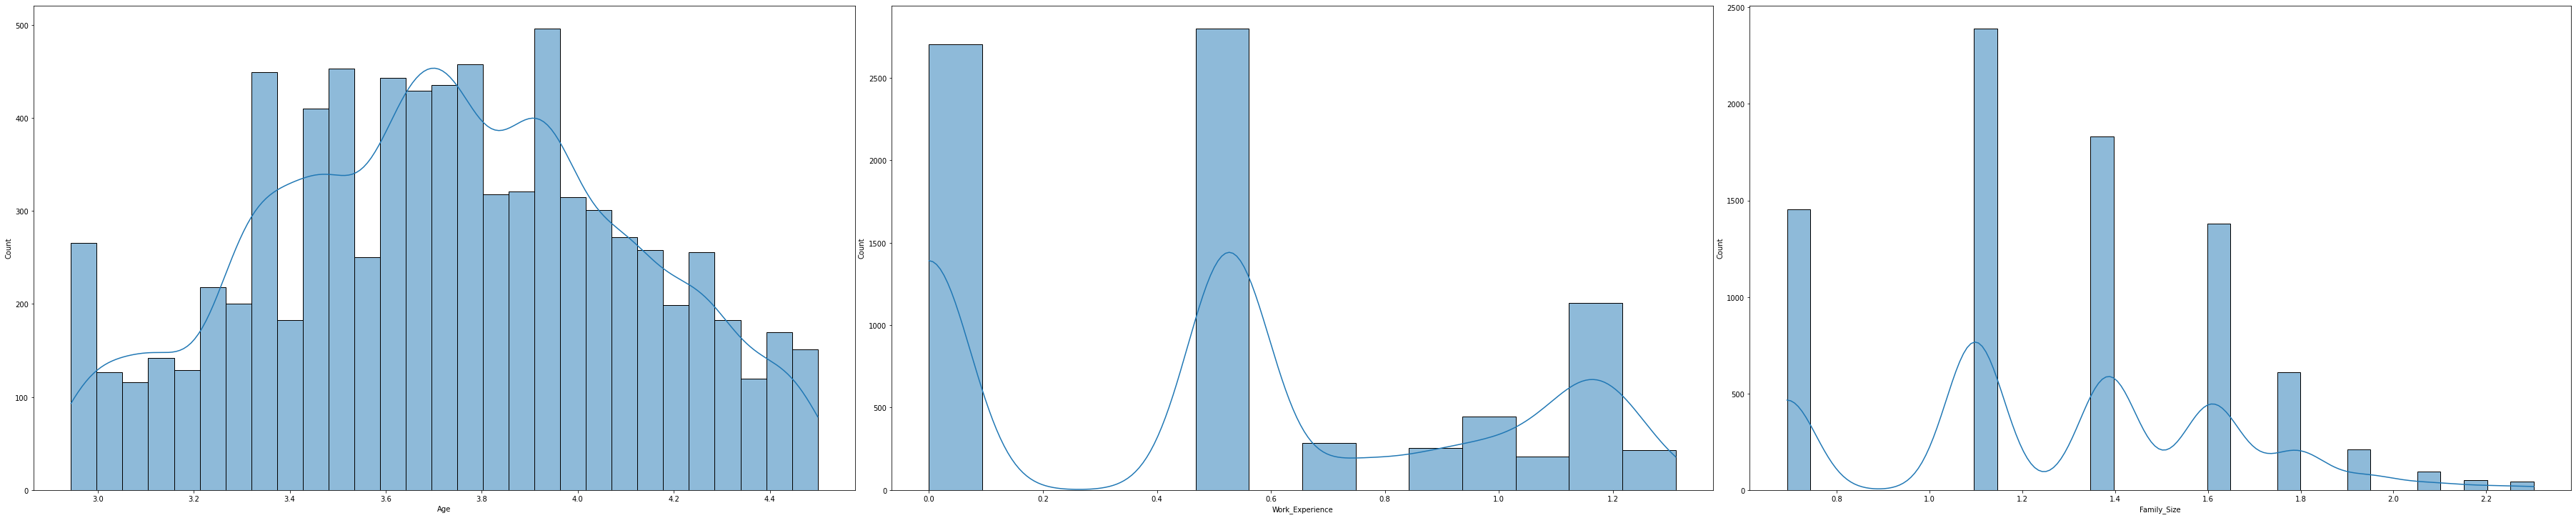

In [ ]:
# Plot the distribution graph
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(50, 10))
index = 0
axs = axs.flatten()
for k,v in df[numericals].items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

It can be seen in the histogram above that the shape of the distribution of numerical data becomes more normal.

#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

column_name = ['Age', 'Work_Experience', 'Family_Size']

# Scale the X
standard_scaler = StandardScaler()
df[numericals] = pd.DataFrame(data=standard_scaler.fit_transform(df[numericals]), columns=column_name)

# Check result
df[numericals].head()

,Age,Work_Experience,Family_Size
0,-1.569557,0.013437,0.876402
1,-0.163683,0.013437,0.286154
2,1.316412,0.013437,-1.547326
3,1.316412,-1.186937,-0.474809
4,-0.030541,-1.186937,1.766423


### Checking Encoding Result

In [ ]:
df.head()

,ID,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,-1.569557,0.013437,1,0.876402,4,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,462643,-0.163683,0.013437,2,0.286154,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,466315,1.316412,0.013437,1,-1.547326,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,461735,1.316412,-1.186937,3,-0.474809,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,462669,-0.030541,-1.186937,3,1.766423,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8068 non-null   int64  
 1   Age                       8068 non-null   float64
 2   Work_Experience           8068 non-null   float64
 3   Spending_Score            8068 non-null   int64  
 4   Family_Size               8068 non-null   float64
 5   Segmentation              8068 non-null   int64  
 6   Gender_Female             8068 non-null   uint8  
 7   Gender_Male               8068 non-null   uint8  
 8   Ever_Married_No           8068 non-null   uint8  
 9   Ever_Married_Yes          8068 non-null   uint8  
 10  Graduated_No              8068 non-null   uint8  
 11  Graduated_Yes             8068 non-null   uint8  
 12  Profession_Artist         8068 non-null   uint8  
 13  Profession_Doctor         8068 non-null   uint8  
 14  Professi

# Feature Enginering

This section is a feature engineering section that is carried out to convert numerical data into categorical data. However, from the results of discussions and mentoring, in the first module, this feature will not be used.

## Feature Engineering 1

In feature engineering 1, all numerical data on feature age, work experience, and family size are categorized using bining.

### Age

In [ ]:
# Copy dari dfclean
df_fe1 = dfclean.copy()
df_fe1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


In [ ]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df_fe1['Age'].quantile(quantile_list)
quantiles

0.00    18.0
0.25    30.0
0.50    40.0
0.75    53.0
1.00    89.0
Name: Age, dtype: float64

Text(0, 0.5, 'Frequency')

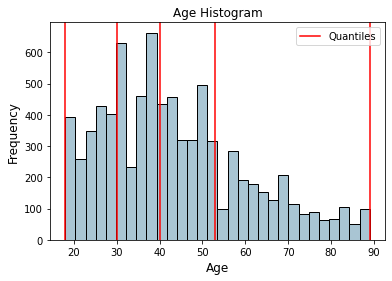

In [ ]:
fig, ax = plt.subplots()
df_fe1['Age'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

made a label from Age

In [ ]:
df_fe1['Age_Group'] = pd.cut(df_fe1['Age'],bins=[18.0,30.0,40.0,53.0,89.0],\
                                   labels=[ 'Remaja','Dewasa','Paruh Baya','Lansia'], include_lowest=True)

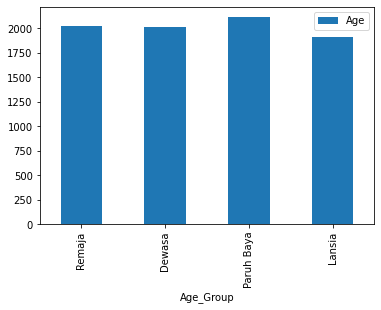

In [ ]:
df_bin = df_fe1.groupby('Age_Group').count().reset_index()
df_bin.plot(x='Age_Group', y='Age', kind='bar')

### Work Experience

In [ ]:
quantile_list = [0, .25, .5, .75, 1.]
quantileswe = df_fe1['Work_Experience'].quantile(quantile_list)
quantileswe

0.00     0.0
0.25     0.0
0.50     1.0
0.75     4.0
1.00    14.0
Name: Work_Experience, dtype: float64

In [ ]:
def cat_we(df):
    if(df['Work_Experience']==0):
        return 'A'
    if(df['Work_Experience']>0)and(df['Work_Experience']<=1):
        return 'B'
    if(df['Work_Experience']>1)and(df['Work_Experience']<=4):
        return 'C'
    if(df['Work_Experience']>4):
        return 'D'
 
df_fe1['WE_group']=df_fe1.apply(cat_we,axis=1)
df_fe1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group,WE_group
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Remaja,B
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Dewasa,B
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,Lansia,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,Lansia,A
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A,Dewasa,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.0,Low,7.0,Cat_1,D,Remaja,A
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,Dewasa,C
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,Dewasa,B
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,Remaja,B


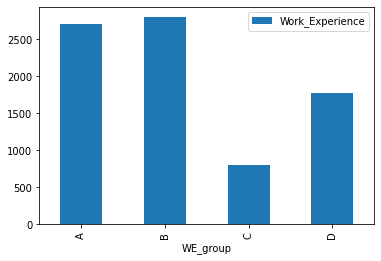

In [ ]:
df_bin = df_fe1.groupby('WE_group').count().reset_index()
df_bin.plot(x='WE_group', y='Work_Experience', kind='bar')

### Family Size

In [ ]:
quantile_list = [0, .25, .5, .75, 1.]
quantilesfs = df_fe1['Family_Size'].quantile(quantile_list)
quantilesfs

0.00    1.0
0.25    2.0
0.50    3.0
0.75    4.0
1.00    9.0
Name: Family_Size, dtype: float64

In [ ]:
df_fe1['Family_Size_Group'] = pd.cut(df_fe1['Family_Size'],bins=[0.0,2.0,4.0,9.0],\
                                   labels=['Low','Mid','High'], include_lowest=True)

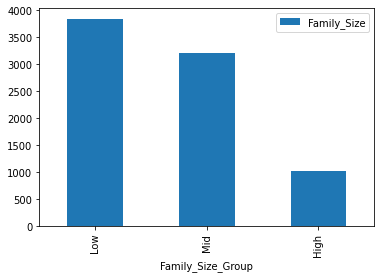

In [ ]:
df_bin = df_fe1.groupby('Family_Size_Group').count().reset_index()
df_bin.plot(x='Family_Size_Group', y='Family_Size', kind='bar')

### Data Encoding

In [ ]:
df_fe1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group,WE_group,Family_Size_Group
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Remaja,B,Mid
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Dewasa,B,Mid
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,Lansia,B,Low
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,Lansia,A,Low
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A,Dewasa,A,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.0,Low,7.0,Cat_1,D,Remaja,A,High
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,Dewasa,C,Mid
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,Dewasa,B,Low
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,Remaja,B,Mid


In [ ]:
df_fe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 8068 non-null   int64   
 1   Gender             8068 non-null   object  
 2   Ever_Married       8068 non-null   object  
 3   Age                8068 non-null   int64   
 4   Graduated          8068 non-null   object  
 5   Profession         8068 non-null   object  
 6   Work_Experience    8068 non-null   float64 
 7   Spending_Score     8068 non-null   object  
 8   Family_Size        8068 non-null   float64 
 9   Var_1              8068 non-null   object  
 10  Segmentation       8068 non-null   object  
 11  Age_Group          8068 non-null   category
 12  WE_group           8068 non-null   object  
 13  Family_Size_Group  8068 non-null   category
dtypes: category(2), float64(2), int64(2), object(8)
memory usage: 772.5+ KB


#### Label Encoding

In [ ]:
replacerfe1= {"Spending_Score":{"Low": 1, "Average": 2,"High":3}, 
"Segmentation":{"A": 1, "B": 2, "C": 3, "D": 4}, 
"Age_Group":{"Remaja": 1, "Dewasa": 2, "Paruh Baya": 3, "Lansia": 4},
"WE_group":{"A": 1, "B": 2, "C": 3, "D": 4},
"Family_Size_Group":{"Low": 1, "Mid": 2,"High":3}}

df_fe1 = df_fe1.replace(replacerfe1)
df_fe1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group,WE_group,Family_Size_Group
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0,Cat_4,4,1,2,2
1,462643,Female,Yes,38,Yes,Engineer,1.0,2,3.0,Cat_4,1,2,2,2
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0,Cat_6,2,4,2,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,Cat_6,2,4,1,1
4,462669,Female,Yes,40,Yes,Entertainment,0.0,3,6.0,Cat_6,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.0,1,7.0,Cat_1,4,1,1,3
8064,464685,Male,No,35,No,Executive,3.0,1,4.0,Cat_4,4,2,3,2
8065,465406,Female,No,33,Yes,Healthcare,1.0,1,1.0,Cat_6,4,2,2,1
8066,467299,Female,No,27,Yes,Healthcare,1.0,1,4.0,Cat_6,2,1,2,2


In [ ]:
df_fe1 = df_fe1.drop(['Age', 'Work_Experience', 'Family_Size'], axis=1)
df_fe1

,ID,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age_Group,WE_group,Family_Size_Group
0,462809,Male,No,No,Healthcare,1,Cat_4,4,1,2,2
1,462643,Female,Yes,Yes,Engineer,2,Cat_4,1,2,2,2
2,466315,Female,Yes,Yes,Engineer,1,Cat_6,2,4,2,1
3,461735,Male,Yes,Yes,Lawyer,3,Cat_6,2,4,1,1
4,462669,Female,Yes,Yes,Entertainment,3,Cat_6,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,No,Artist,1,Cat_1,4,1,1,3
8064,464685,Male,No,No,Executive,1,Cat_4,4,2,3,2
8065,465406,Female,No,Yes,Healthcare,1,Cat_6,4,2,2,1
8066,467299,Female,No,Yes,Healthcare,1,Cat_6,2,1,2,2


#### One Hot Encoding

In [ ]:
categoricals1

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']

In [ ]:
for col in categoricals1:
  df_fe1 = pd.get_dummies(df_fe1, columns=[col], prefix=[col])

### Check Data Feature Engineering 1

In [ ]:
df_fe1.head()

,ID,Spending_Score,Segmentation,Age_Group,WE_group,Family_Size_Group,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,1,4,1,2,2,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,462643,2,1,2,2,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,466315,1,2,4,2,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,461735,3,2,4,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,462669,3,1,2,1,3,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_fe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ID                        8068 non-null   int64
 1   Spending_Score            8068 non-null   int64
 2   Segmentation              8068 non-null   int64
 3   Age_Group                 8068 non-null   int64
 4   WE_group                  8068 non-null   int64
 5   Family_Size_Group         8068 non-null   int64
 6   Gender_Female             8068 non-null   uint8
 7   Gender_Male               8068 non-null   uint8
 8   Ever_Married_No           8068 non-null   uint8
 9   Ever_Married_Yes          8068 non-null   uint8
 10  Graduated_No              8068 non-null   uint8
 11  Graduated_Yes             8068 non-null   uint8
 12  Profession_Artist         8068 non-null   uint8
 13  Profession_Doctor         8068 non-null   uint8
 14  Profession_Engineer       8068 non-null 

## Feature Engineering 2

Feature Engineering 2 is carried out on stage 2 (df) data by removing the Gender, Ever_Married, and Graduated features with the consideration that these features have the lowest feature importance from the calculation of the feature importance decision tree.

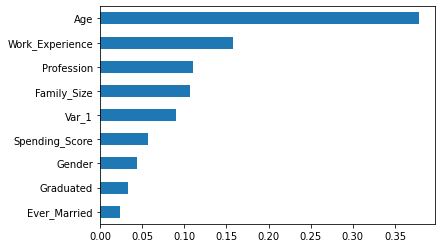

In [ ]:
from sklearn.tree import DecisionTreeClassifier

df_check = dfclean.copy()
for i in df_check[categoricals].columns:
    df_check[i] = df_check[i].astype('category')
    df_check[i] = df_check[i].cat.codes

X = df_check.drop(['ID','Segmentation'],1)
y = df_check['Segmentation']

model=DecisionTreeClassifier()
model.fit(X,y)

%matplotlib inline
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nsmallest(100).plot(kind='barh')
plt.show()

In [ ]:
df_fe2 = df.copy()
df_fe2 = df_fe2.drop(columns=['Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes'], axis=1)

### Check Data Feature Engineering 2

In [ ]:
df_fe2.head()

,ID,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,-1.569557,0.013437,1,0.876402,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,462643,-0.163683,0.013437,2,0.286154,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,466315,1.316412,0.013437,1,-1.547326,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,461735,1.316412,-1.186937,3,-0.474809,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,462669,-0.030541,-1.186937,3,1.766423,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_fe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8068 non-null   int64  
 1   Age                       8068 non-null   float64
 2   Work_Experience           8068 non-null   float64
 3   Spending_Score            8068 non-null   int64  
 4   Family_Size               8068 non-null   float64
 5   Segmentation              8068 non-null   int64  
 6   Profession_Artist         8068 non-null   uint8  
 7   Profession_Doctor         8068 non-null   uint8  
 8   Profession_Engineer       8068 non-null   uint8  
 9   Profession_Entertainment  8068 non-null   uint8  
 10  Profession_Executive      8068 non-null   uint8  
 11  Profession_Healthcare     8068 non-null   uint8  
 12  Profession_Homemaker      8068 non-null   uint8  
 13  Profession_Lawyer         8068 non-null   uint8  
 14  Professi

## Feature Engineering 3

Feature Engineering 3 is carried out on stage 2 (df) data by removing the Gender and Var_1 features with the consideration that both have the lowest categorical correlation score against the target based on Cramer's V calculations.

In [ ]:
df_fe3 = dfclean.copy()
df_fe3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df_fe3 = df_fe3.drop(columns=['Gender', 'Var_1'], axis=1)
df_fe3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Ever_Married     8068 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   object 
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      8068 non-null   float64
 8   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 567.4+ KB


###  Categoricals

#### Label Encoding

In [ ]:
# Label encoding untuk Spending_Score dan Target
replacerfe3= {"Spending_Score":{"Low": 1, "Average": 2,"High":3}, "Segmentation":{"A": 1, "B": 2, "C": 3, "D": 4}}

In [ ]:
df_fe3 = df_fe3.replace(replacerfe3)
df_fe3.head()

,ID,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,No,22,No,Healthcare,1.0,1,4.0,4
1,462643,Yes,38,Yes,Engineer,1.0,2,3.0,1
2,466315,Yes,67,Yes,Engineer,1.0,1,1.0,2
3,461735,Yes,67,Yes,Lawyer,0.0,3,2.0,2
4,462669,Yes,40,Yes,Entertainment,0.0,3,6.0,1


#### One Hot Encoding

In [ ]:
categoricals2 = categoricals1
categoricals2.remove('Gender')
categoricals2.remove('Var_1')

categoricals2

['Ever_Married', 'Graduated', 'Profession']

In [ ]:
# Lakukan One hot encoding

for col in categoricals2:
  df_fe3 = pd.get_dummies(df_fe3, columns=[col], prefix=[col])

### Numericals

In [ ]:
X_raw_numfe3 = df_fe3[['Age', 'Work_Experience', 'Family_Size']]
X_raw_numfe3.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,1.0,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,0.0,6.0


### Outliers Handling

In [ ]:
# Transform the skewed distribution
for col in df_fe3.columns:
    if col in numericals:
        if df_fe3[col].skew() > 0.5: # right skew, log
            df_fe3[col]= df_fe3[col].apply(lambda x: np.log1p(x))
            if df_fe3[col].skew() > 0.5: # right skew, log
                print ("Log twice: ", col, "  Because the skewness still %.2f" %(df_fe3[col].skew()))
                df_fe3[col]= df_fe3[col].apply(lambda x: np.log1p(x))
            else:
                print ("Log once: ", col)
    
df_fe3[numericals].head()

Log once:  Age
Log twice:  Work_Experience   Because the skewness still 0.66
Log once:  Family_Size


,Age,Work_Experience,Family_Size
0,3.135494,0.526589,1.609438
1,3.663562,0.526589,1.386294
2,4.219508,0.526589,0.693147
3,4.219508,0.000000,1.098612
4,3.713572,0.000000,1.945910


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

column_name = ['Age', 'Work_Experience', 'Family_Size']

# Scale the X
standard_scaler = StandardScaler()
df_fe3[numericals] = pd.DataFrame(data=standard_scaler.fit_transform(df_fe3[numericals]), columns=column_name)

# Check result
df_fe3[numericals].head()

,Age,Work_Experience,Family_Size
0,-1.569557,0.013437,0.876402
1,-0.163683,0.013437,0.286154
2,1.316412,0.013437,-1.547326
3,1.316412,-1.186937,-0.474809
4,-0.030541,-1.186937,1.766423


### Check Data Feature Engineering 3

In [ ]:
df_fe3.head()

,ID,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,-1.569557,0.013437,1,0.876402,4,1,0,1,0,0,0,0,0,0,1,0,0,0
1,462643,-0.163683,0.013437,2,0.286154,1,0,1,0,1,0,0,1,0,0,0,0,0,0
2,466315,1.316412,0.013437,1,-1.547326,2,0,1,0,1,0,0,1,0,0,0,0,0,0
3,461735,1.316412,-1.186937,3,-0.474809,2,0,1,0,1,0,0,0,0,0,0,0,1,0
4,462669,-0.030541,-1.186937,3,1.766423,1,0,1,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
df_fe3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8068 non-null   int64  
 1   Age                       8068 non-null   float64
 2   Work_Experience           8068 non-null   float64
 3   Spending_Score            8068 non-null   int64  
 4   Family_Size               8068 non-null   float64
 5   Segmentation              8068 non-null   int64  
 6   Ever_Married_No           8068 non-null   uint8  
 7   Ever_Married_Yes          8068 non-null   uint8  
 8   Graduated_No              8068 non-null   uint8  
 9   Graduated_Yes             8068 non-null   uint8  
 10  Profession_Artist         8068 non-null   uint8  
 11  Profession_Doctor         8068 non-null   uint8  
 12  Profession_Engineer       8068 non-null   uint8  
 13  Profession_Entertainment  8068 non-null   uint8  
 14  Professi

## Feature Engineering 4

Feature Engineering 4 takes the idea of ​​the D segment persona which is considered the most prominent (the most visible pattern compared to other segments)

In [ ]:
df_fe4 = dfclean.copy()

In [ ]:
def mapping_fam(df):
    #Small
    if (df['Family_Size'] <= 2):
        return 'Small_Fam'

    #Medium
    elif(df['Family_Size'] > 2) and (df['Family_Size'] <= 6):
        return 'Medium_Fam'

    #High
    else:
        return 'High_Fam'

    
def mapping_age(df):
    #Small
    if (df['Age'] <= 35):
        return 'Young_Adult'

    #Medium
    elif(df['Age'] > 35) and (df['Age'] <= 55):
        return 'Adult'

    #High
    else:
        return 'Oldies'

In [ ]:
df_fe4['Fam_Segment'] = df_fe4.apply(lambda x: mapping_fam(x), axis=1)
df_fe4['Age_Segment'] = df_fe4.apply(lambda x: mapping_age(x), axis=1)

df_fe4.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Fam_Segment,Age_Segment
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Medium_Fam,Young_Adult
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Medium_Fam,Adult


In [ ]:
df_fe4['Age_Prof_Spending'] = df_fe4[['Age_Segment', 'Profession', 'Spending_Score']].agg('-'.join, axis=1)
df_fe4['Age_Prof_Spending'].head(2)

0    Young_Adult-Healthcare-Low
1        Adult-Engineer-Average
Name: Age_Prof_Spending, dtype: object

### Young_Adult-Healthcare-Low

In [ ]:
df_check = df_fe4[df_fe4['Age_Prof_Spending'] == "Young_Adult-Healthcare-Low"]
df_check.groupby('Segmentation')['Age'].agg(len)

Segmentation
A     65
B     75
C    125
D    891
Name: Age, dtype: int64

In [ ]:
def youngHealthLow(df):
    if (df['Age_Prof_Spending'] == "Young_Adult-Healthcare-Low"):
        return 1
    else:
        return 0

df_fe4['Young_Healthcare_Low'] = df_fe4.apply(lambda x: youngHealthLow(x), axis=1)
df_fe4.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Fam_Segment,Age_Segment,Age_Prof_Spending,Young_Healthcare_Low
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Medium_Fam,Young_Adult,Young_Adult-Healthcare-Low,1
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Medium_Fam,Adult,Adult-Engineer-Average,0


### Young_Adult-Doctor-Low

In [ ]:
df_check = df_fe4[df_fe4['Age_Prof_Spending'] == "Young_Adult-Doctor-Low"]
df_check.groupby('Segmentation')['Age'].agg(len)

Segmentation
A     76
B     33
C     47
D    156
Name: Age, dtype: int64

In [ ]:
def youngDocLow(df):
    if (df['Age_Prof_Spending'] == "Young_Adult-Doctor-Low"):
        return 1
    else:
        return 0

df_fe4['Young_Doctor_Low'] = df_fe4.apply(lambda x: youngDocLow(x), axis=1)
df_fe4.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Fam_Segment,Age_Segment,Age_Prof_Spending,Young_Healthcare_Low,Young_Doctor_Low
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Medium_Fam,Young_Adult,Young_Adult-Healthcare-Low,1,0
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Medium_Fam,Adult,Adult-Engineer-Average,0,0


### Young_Adult-Entertainment-Low

In [ ]:
df_check = df_fe4[df_fe4['Age_Prof_Spending'] == "Young_Adult-Entertainment-Low"]
df_check.groupby('Segmentation')['Age'].agg(len)

Segmentation
A     77
B     27
C     27
D    104
Name: Age, dtype: int64

In [ ]:
def youngEntertainLow(df):
    if (df['Age_Prof_Spending'] == "Young_Adult-Entertainment-Low"):
        return 1
    else:
        return 0

df_fe4['Young_Entertainment_Low'] = df_fe4.apply(lambda x: youngEntertainLow(x), axis=1)
df_fe4.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Fam_Segment,Age_Segment,Age_Prof_Spending,Young_Healthcare_Low,Young_Doctor_Low,Young_Entertainment_Low
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Medium_Fam,Young_Adult,Young_Adult-Healthcare-Low,1,0,0
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Medium_Fam,Adult,Adult-Engineer-Average,0,0,0


### Remove the Temporary Features

In [ ]:
df_fe4 = df_fe4.drop(['Fam_Segment', 'Age_Segment', 'Age_Prof_Spending'], axis=1)

df_fe4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8068 non-null   int64  
 1   Gender                   8068 non-null   object 
 2   Ever_Married             8068 non-null   object 
 3   Age                      8068 non-null   int64  
 4   Graduated                8068 non-null   object 
 5   Profession               8068 non-null   object 
 6   Work_Experience          8068 non-null   float64
 7   Spending_Score           8068 non-null   object 
 8   Family_Size              8068 non-null   float64
 9   Var_1                    8068 non-null   object 
 10  Segmentation             8068 non-null   object 
 11  Young_Healthcare_Low     8068 non-null   int64  
 12  Young_Doctor_Low         8068 non-null   int64  
 13  Young_Entertainment_Low  8068 non-null   int64  
dtypes: float64(2), int64(5),

In [ ]:
df_fe4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8068 non-null   int64  
 1   Gender                   8068 non-null   object 
 2   Ever_Married             8068 non-null   object 
 3   Age                      8068 non-null   int64  
 4   Graduated                8068 non-null   object 
 5   Profession               8068 non-null   object 
 6   Work_Experience          8068 non-null   float64
 7   Spending_Score           8068 non-null   object 
 8   Family_Size              8068 non-null   float64
 9   Var_1                    8068 non-null   object 
 10  Segmentation             8068 non-null   object 
 11  Young_Healthcare_Low     8068 non-null   int64  
 12  Young_Doctor_Low         8068 non-null   int64  
 13  Young_Entertainment_Low  8068 non-null   int64  
dtypes: float64(2), int64(5),

### Categoricals

#### Label Encoding

In [ ]:
# Label encoding untuk Spending_Score dan Target
replacerfe4= {"Spending_Score":{"Low": 1, "Average": 2,"High":3}, "Segmentation":{"A": 1, "B": 2, "C": 3, "D": 4}}

In [ ]:
df_fe4 = df_fe4.replace(replacerfe4)
df_fe4.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Young_Healthcare_Low,Young_Doctor_Low,Young_Entertainment_Low
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0,Cat_4,4,1,0,0
1,462643,Female,Yes,38,Yes,Engineer,1.0,2,3.0,Cat_4,1,0,0,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0,Cat_6,2,0,0,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,Cat_6,2,0,0,0
4,462669,Female,Yes,40,Yes,Entertainment,0.0,3,6.0,Cat_6,1,0,0,0


#### One Hot Encoding

In [ ]:
categoricals4 = list(categoricals)
categoricals4.remove('Spending_Score')
categoricals4.remove('Segmentation')
categoricals4

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']

In [ ]:
# Lakukan One hot encoding

for col in categoricals4:
  df_fe4 = pd.get_dummies(df_fe4, columns=[col], prefix=[col])

### Numericals

In [ ]:
X_raw_numfe4 = df_fe4[['Age', 'Work_Experience', 'Family_Size']]
X_raw_numfe4.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,1.0,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,0.0,6.0


### Outliers Handling

In [ ]:
# Transform the skewed distribution
for col in df_fe4.columns:
    if col in numericals:
        if df_fe4[col].skew() > 0.5: # right skew, log
            df_fe4[col]= df_fe4[col].apply(lambda x: np.log1p(x))
            if df_fe4[col].skew() > 0.5: # right skew, log
                print ("Log twice: ", col, "  Because the skewness still %.2f" %(df_fe4[col].skew()))
                df_fe4[col]= df_fe4[col].apply(lambda x: np.log1p(x))
            else:
                print ("Log once: ", col)
    
df_fe4[numericals].head()

Log once:  Age
Log twice:  Work_Experience   Because the skewness still 0.66
Log once:  Family_Size


,Age,Work_Experience,Family_Size
0,3.135494,0.526589,1.609438
1,3.663562,0.526589,1.386294
2,4.219508,0.526589,0.693147
3,4.219508,0.000000,1.098612
4,3.713572,0.000000,1.945910


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

column_name = ['Age', 'Work_Experience', 'Family_Size']

# Scale the X
standard_scaler = StandardScaler()
df_fe4[numericals] = pd.DataFrame(data=standard_scaler.fit_transform(df_fe4[numericals]), columns=column_name)

# Check result
df_fe4[numericals].head()

,Age,Work_Experience,Family_Size
0,-1.569557,0.013437,0.876402
1,-0.163683,0.013437,0.286154
2,1.316412,0.013437,-1.547326
3,1.316412,-1.186937,-0.474809
4,-0.030541,-1.186937,1.766423


### Check Data Feature Engineering 4

In [ ]:
df_fe4.head()

,ID,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Young_Healthcare_Low,Young_Doctor_Low,Young_Entertainment_Low,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,-1.569557,0.013437,1,0.876402,4,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,462643,-0.163683,0.013437,2,0.286154,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,466315,1.316412,0.013437,1,-1.547326,2,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,461735,1.316412,-1.186937,3,-0.474809,2,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,462669,-0.030541,-1.186937,3,1.766423,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_fe4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8068 non-null   int64  
 1   Age                       8068 non-null   float64
 2   Work_Experience           8068 non-null   float64
 3   Spending_Score            8068 non-null   int64  
 4   Family_Size               8068 non-null   float64
 5   Segmentation              8068 non-null   int64  
 6   Young_Healthcare_Low      8068 non-null   int64  
 7   Young_Doctor_Low          8068 non-null   int64  
 8   Young_Entertainment_Low   8068 non-null   int64  
 9   Gender_Female             8068 non-null   uint8  
 10  Gender_Male               8068 non-null   uint8  
 11  Ever_Married_No           8068 non-null   uint8  
 12  Ever_Married_Yes          8068 non-null   uint8  
 13  Graduated_No              8068 non-null   uint8  
 14  Graduate

## Feature Engineering 5

Feature Engineering 5 is done by taking 5 features with the highest feature importance from the calculation of the feature importance decision tree on df data (data from stage 2).

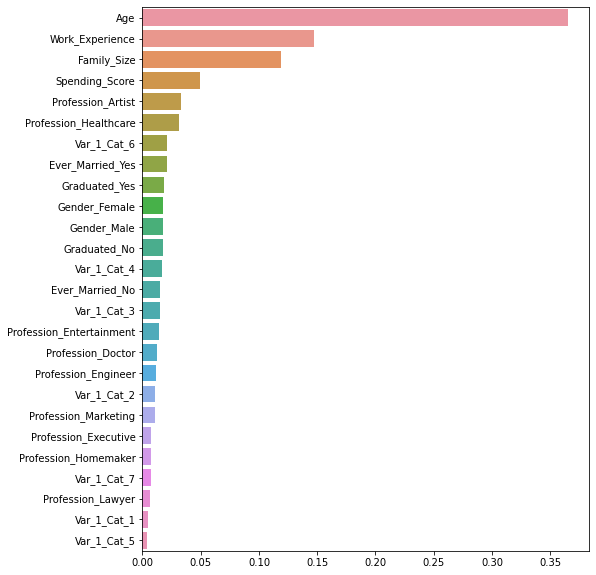

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df_check2 = df.copy()
X = df_check2.drop(['ID','Segmentation'],1)
y = df_check2['Segmentation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

model = RandomForestClassifier()
model.fit(X_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10), sharey=True)
ax = sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.show()

In [ ]:
df_fe5 = df[['ID', 'Age', 'Work_Experience', 'Family_Size', 'Spending_Score', 'Profession_Healthcare', 'Segmentation']]

### Check Data Feature Engineering 5

In [ ]:
df_fe5.head()

,ID,Age,Work_Experience,Family_Size,Spending_Score,Profession_Healthcare,Segmentation
0,462809,-1.569557,0.013437,0.876402,1,1,4
1,462643,-0.163683,0.013437,0.286154,2,0,1
2,466315,1.316412,0.013437,-1.547326,1,0,2
3,461735,1.316412,-1.186937,-0.474809,3,0,2
4,462669,-0.030541,-1.186937,1.766423,3,0,1


In [ ]:
df_fe5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8068 non-null   int64  
 1   Age                    8068 non-null   float64
 2   Work_Experience        8068 non-null   float64
 3   Family_Size            8068 non-null   float64
 4   Spending_Score         8068 non-null   int64  
 5   Profession_Healthcare  8068 non-null   uint8  
 6   Segmentation           8068 non-null   int64  
dtypes: float64(3), int64(3), uint8(1)
memory usage: 386.2 KB


# Machine Learning Modeling and Its Evaluation

In [ ]:
import lightgbm as lgb
import xgboost as xgb

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definisikan function untuk evaluasi
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print(name)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred, average='macro'))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred, average='macro'))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred, average='macro'))
    print("-------------------------------------------------------")

## Model List

In [ ]:
models = []

models.append(("Random Forest", RandomForestClassifier(random_state = 10)))
models.append(("k-Nearest Neighbors", KNeighborsClassifier()))
models.append(("Decision Trees", DecisionTreeClassifier(random_state = 10)))
models.append(("Extra Trees", ExtraTreesClassifier(random_state = 10)))
models.append(("Naive Bayes", GaussianNB()))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state = 10)))
models.append(("Logistic Regression", LogisticRegression(multi_class='ovr', max_iter=400, random_state = 10)))
models.append(("Support Vector Machine", SVC(decision_function_shape='ovo', random_state=10))) 
models.append(("XGboost", XGBClassifier(random_state = 10)))
models.append(("LGBM", LGBMClassifier(random_state = 10)))

In [ ]:
# Membuat dataframe kosong untuk menyimpan hasil modelling
modelresult = pd.DataFrame()

# Keseluruhan dataset
datas = []
datas.append(df)
datas.append(df_fe1)
datas.append(df_fe2)
datas.append(df_fe3)
datas.append(df_fe4)
datas.append(df_fe5)

datasetname = ['df', 'df_fe1', 'df_fe2', 'df_fe3', 'df_fe4', 'df_fe5']

## Initial Modeling of All Datasets

---



In [ ]:
data_modres = []
model_modres = []
train_modres = []
test_modres = []
acc_modres = []
prec_modres = []
rec_modres = []
f1_modres = []

for dataset, dataname in zip(datas, datasetname):
  np.random.seed(10)
  X = dataset.drop(['Segmentation', 'ID'], axis=1) # feature, semua digunakan
  y = dataset['Segmentation'] # target

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

  dataname = dataname
  for name, model in models:
    np.random.seed(10)
    model = model
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    data_modres.append(dataname)
    model_modres.append(name)
    train_modres.append(str(round(model.score(X_train, y_train), 2)))
    test_modres.append(str(round(model.score(X_test, y_test), 2)))
    acc_modres.append(str(round(accuracy_score(y_test, pred), 2)))
    prec_modres.append(str(round(precision_score(y_test, pred, average='macro'), 2)))
    rec_modres.append(str(round(recall_score(y_test, pred, average='macro'), 2)))
    f1_modres.append(str(round(f1_score(y_test, pred, average='macro'), 2)))

modelresult['Data'] = data_modres
modelresult['Model'] = model_modres
modelresult['Train Score'] = train_modres
modelresult['Test Score'] = test_modres
modelresult['Accuracy'] = acc_modres
modelresult['Precision'] = prec_modres
modelresult['Recall'] = rec_modres
modelresult['F1 Score'] = f1_modres

warnings.filterwarnings("ignore")

### Results of Initial Modeling 

In [ ]:
modelresult.sort_values(by='Accuracy', ascending=False)

,Data,Model,Train Score,Test Score,Accuracy,Precision,Recall,F1 Score
48,df_fe4,XGboost,0.57,0.54,0.54,0.53,0.53,0.53
18,df_fe1,XGboost,0.56,0.54,0.54,0.53,0.53,0.53
28,df_fe2,XGboost,0.55,0.54,0.54,0.53,0.53,0.52
5,df,Gradient Boosting,0.58,0.54,0.54,0.53,0.53,0.53
8,df,XGboost,0.56,0.54,0.54,0.53,0.53,0.53
45,df_fe4,Gradient Boosting,0.59,0.54,0.54,0.53,0.53,0.53
47,df_fe4,Support Vector Machine,0.57,0.54,0.54,0.53,0.53,0.52
35,df_fe3,Gradient Boosting,0.57,0.53,0.53,0.52,0.52,0.52
17,df_fe1,Support Vector Machine,0.54,0.53,0.53,0.53,0.52,0.52
39,df_fe3,LGBM,0.63,0.53,0.53,0.51,0.51,0.51


### Result of Barchart

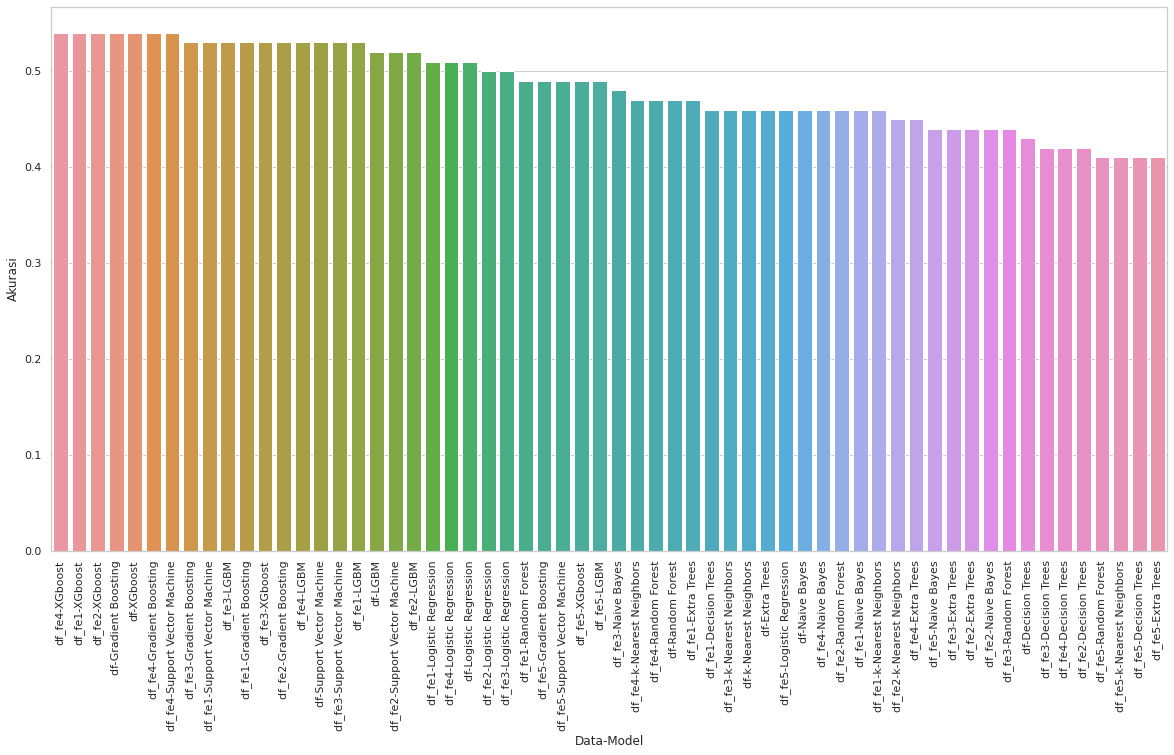

In [ ]:
dfresult = modelresult.sort_values(by='Accuracy', ascending=False)
dfresult = dfresult[['Data', 'Model', 'Accuracy', 'Train Score', 'Test Score']]
dfresult['Data-Model'] = dfresult['Data'] + str('-') + dfresult['Model']
dfresult['Akurasi'] = dfresult['Accuracy'].astype(float)
dfresult['Train Score'] = dfresult['Train Score'].astype(float)
dfresult['Test Score'] = dfresult['Test Score'].astype(float)
dfresult

plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Data-Model', y='Akurasi', data=dfresult)
plt.xticks(rotation=90)
warnings.filterwarnings("ignore")

### Underfitting/Overfitting Analysis

* Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm does not fit the data well enough. Underfitting can be avoided by using more data and also reducing the features by feature selection.
* A statistical model is said to be overfitted, when we train it with a lot of data. A solution to avoid overfitting is using a linear algorithm if we have linear data or using the parameters like the maximal depth if we are using decision trees.
* A model that is underfit will have high training and high testing error while an overfit model will have extremely low training error but a high testing error.

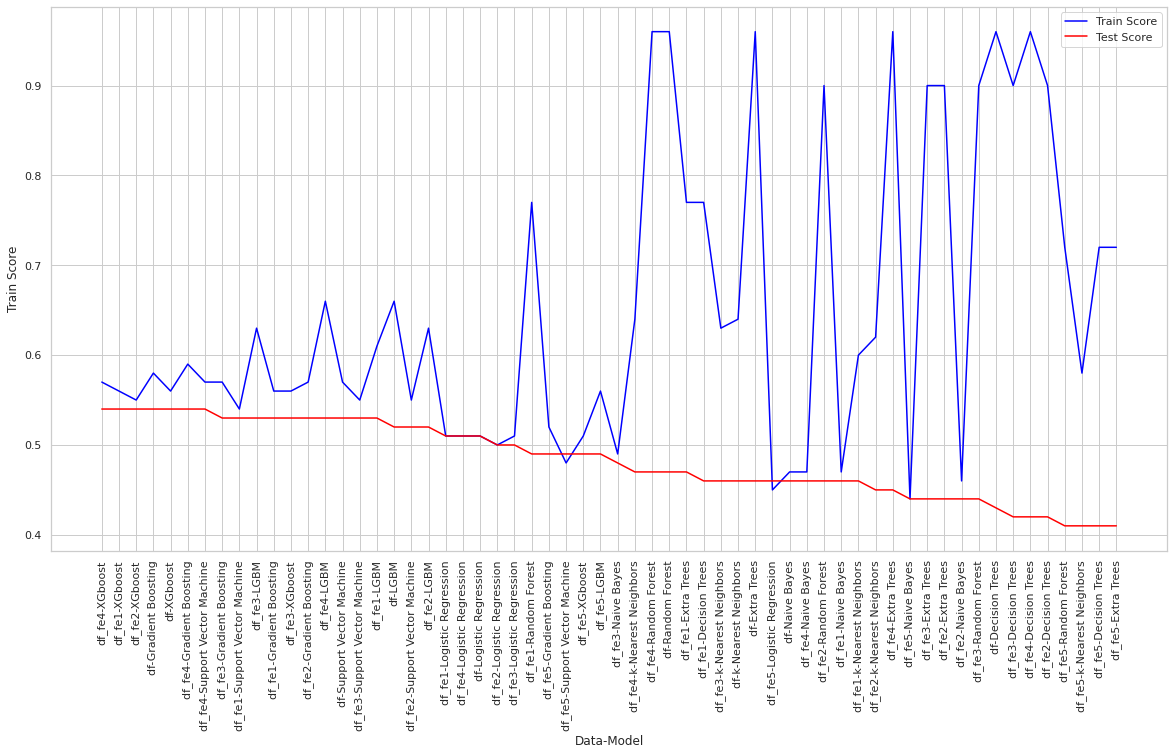

In [ ]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.lineplot('Data-Model', 'Train Score', color ='blue', data=dfresult, label = 'Train Score')
sns.lineplot('Data-Model', 'Test Score', color ='red', data=dfresult, label = 'Test Score')
plt.legend()
plt.xticks(rotation=90)
warnings.filterwarnings("ignore")

## Hyperparameter Tuning

The optimal hyperparameters help to avoid under-fitting (training and test error are both high) and over-fitting (Training error is low but test error is high)

In [ ]:
# Function untuk split train dan test di dataset yang diinginkan
def splittraintest(dataset):
    X = dataset.drop(['Segmentation', 'ID'], axis=1) # feature, semua digunakan
    y = dataset['Segmentation'] # target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
    return X_train, X_test, y_train, y_test

### Gradient Boosting

#### Check Hyperparameter

Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

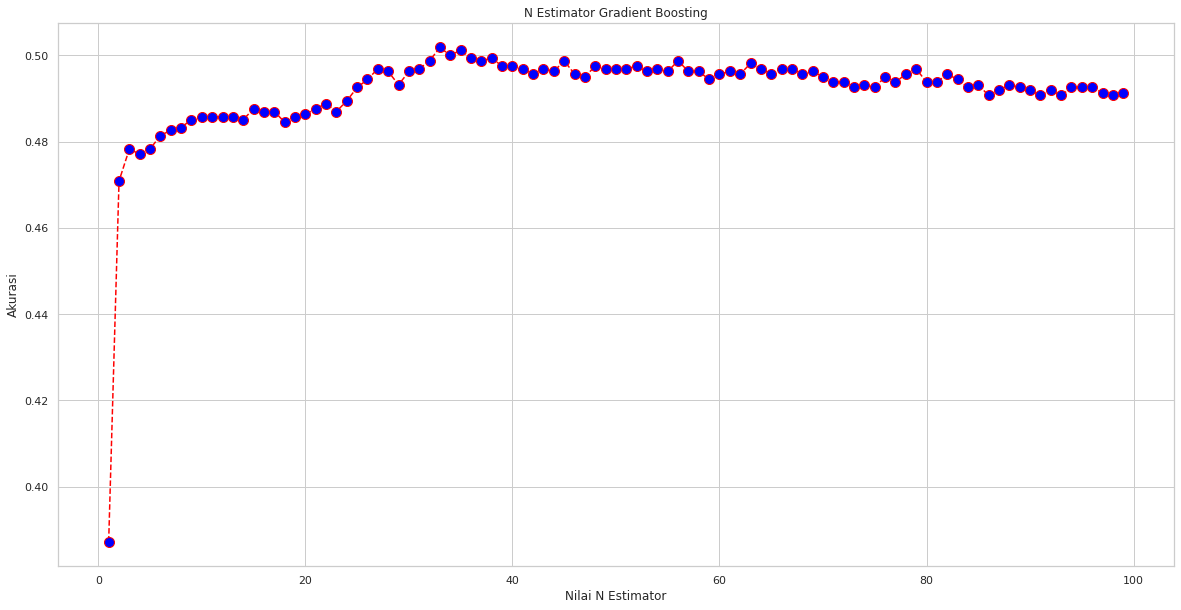

In [ ]:
acc_nestimator = []

# Calculating accuracy for n_estimator 
for i in range(1,100): 
    np.random.seed(10) 
    model = GradientBoostingClassifier(random_state=10, n_estimators=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_nestimator.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(range(1, 100), acc_nestimator, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('N Estimator Gradient Boosting')  
plt.xlabel('Nilai N Estimator')  
plt.ylabel('Akurasi')
warnings.filterwarnings("ignore")

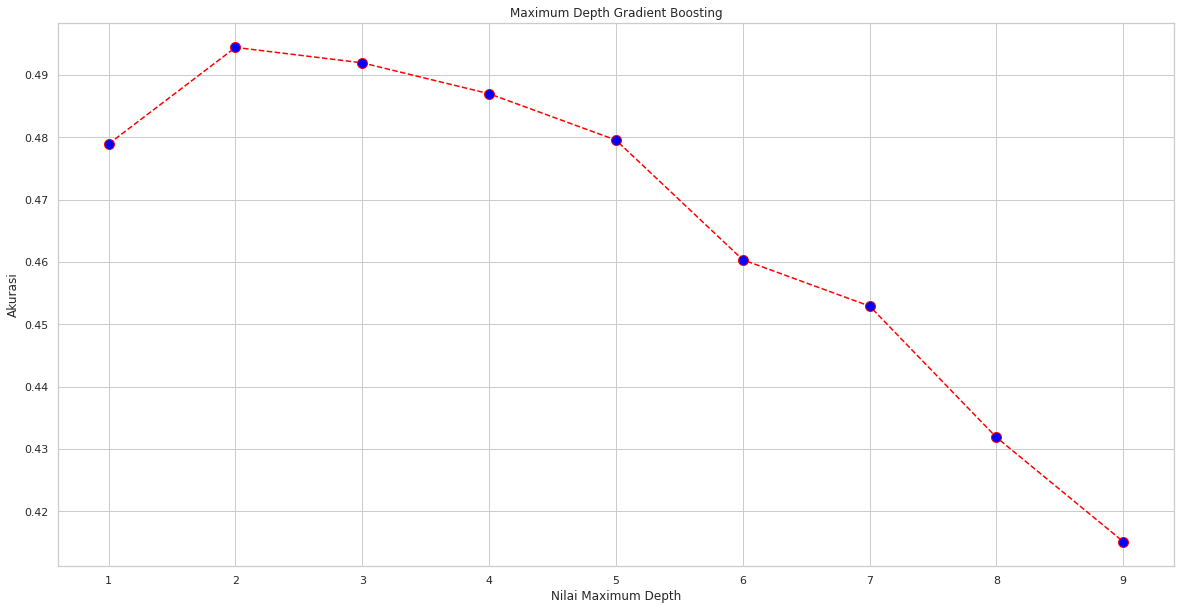

In [ ]:
acc_maxdepth = []

# Calculating accuracy 
for i in range(1,10): 
    np.random.seed(10) 
    model = GradientBoostingClassifier(random_state=10, max_depth=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_maxdepth.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(range(1, 10), acc_maxdepth, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Maximum Depth Gradient Boosting')  
plt.xlabel('Nilai Maximum Depth')  
plt.ylabel('Akurasi')
warnings.filterwarnings("ignore")

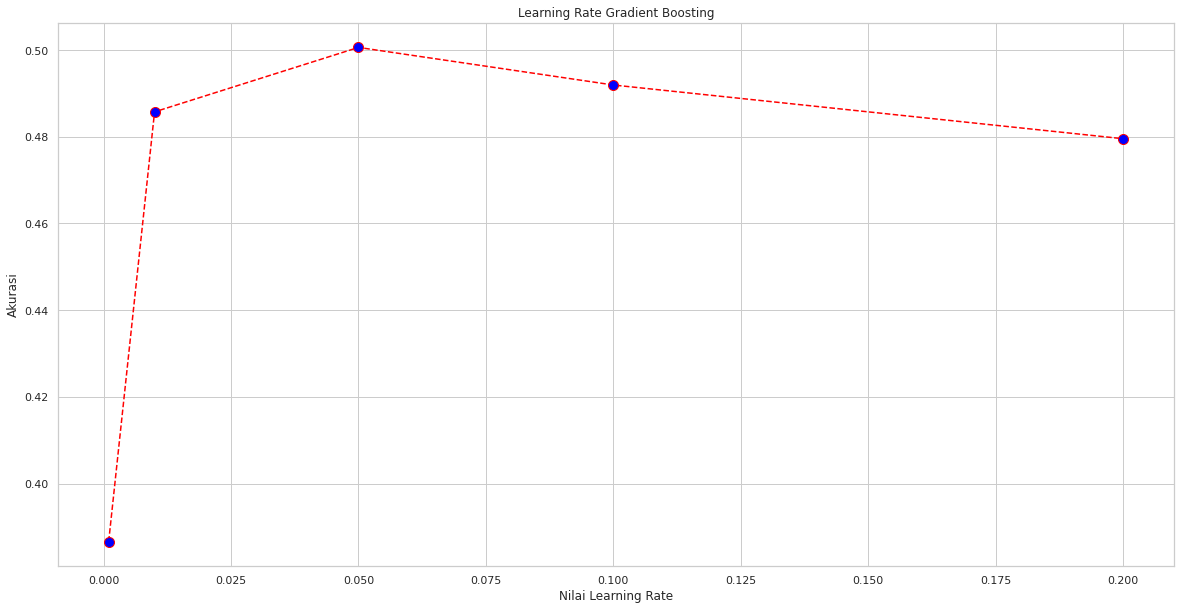

In [ ]:
acc_learningrate = []
learnrate = [0.001, 0.01, 0.05, 0.1, 0.2]

# Calculating accuracy 
for i in learnrate:  
    np.random.seed(10)
    model = GradientBoostingClassifier(random_state=10, learning_rate=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_learningrate.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(learnrate, acc_learningrate, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Learning Rate Gradient Boosting')  
plt.xlabel('Nilai Learning Rate')  
plt.ylabel('Akurasi')
warnings.filterwarnings("ignore")

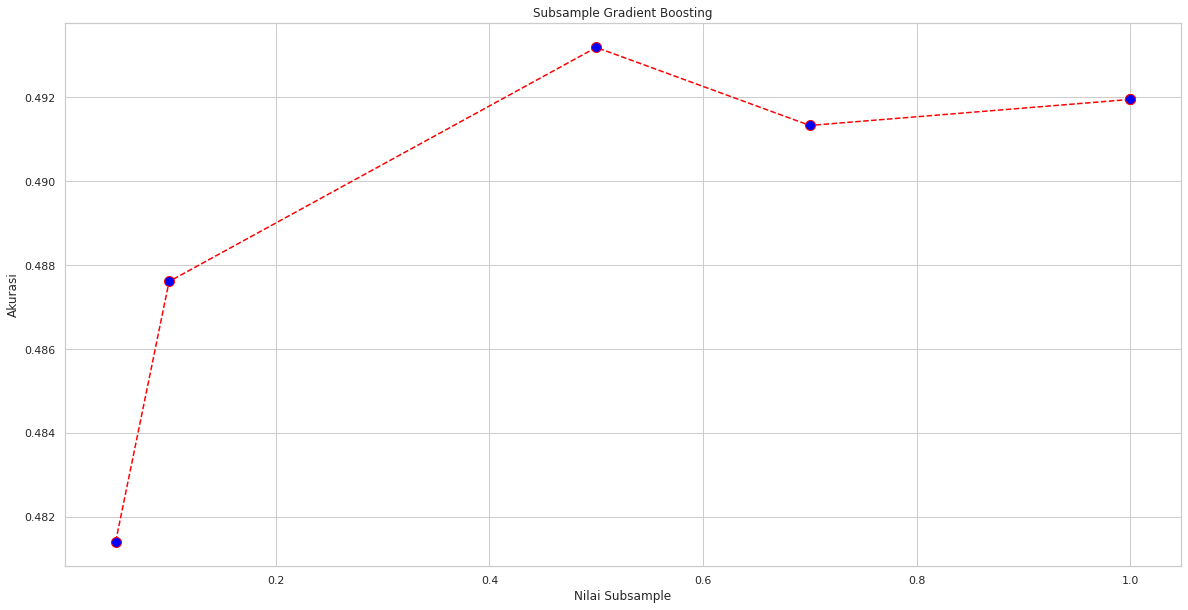

In [ ]:
acc_subsample = []
subsample = [0.05, 0.1, 0.5, 0.7, 1.0, 1.0]

# Calculating accuracy  
for i in subsample:  
    np.random.seed(10)
    model = GradientBoostingClassifier(random_state=10, subsample=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_subsample.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(subsample, acc_subsample, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Subsample Gradient Boosting')  
plt.xlabel('Nilai Subsample')  
plt.ylabel('Akurasi')
warnings.filterwarnings("ignore")

In [ ]:
hyperparametergb = {'n_estimators' : [27, 28],
                   'learning_rate' : [0.05, 0.1],
                   'subsample' : [0.05, 0.1],
                   'max_depth' : [2, 3]}

print(hyperparametergb)

{'n_estimators': [27, 28], 'learning_rate': [0.05, 0.1], 'subsample': [0.05, 0.1], 'max_depth': [2, 3]}


#### Data df_fe4

In [ ]:
X_train, X_test, y_train, y_test = splittraintest(df_fe4)

In [ ]:
# Inisialisasi Model
np.random.seed(10)
model = GradientBoostingClassifier(random_state=10)

gb_grid = GridSearchCV(model, cv=3, param_grid=hyperparametergb)
best_model = gb_grid.fit(X_train, y_train)
grid_pred = gb_grid.predict(X_test)

print("Best Score : ", round(best_model.best_score_, 2))
print("Best classifier : ", best_model.best_estimator_)
print("Accuracy : ", round(accuracy_score(y_test, grid_pred), 2))
print("Precision : ", round(precision_score(y_test, grid_pred, average='macro'), 2))
print("Recall : ", round(recall_score(y_test, grid_pred, average='macro'), 2))
print("F1 Score : ", round(f1_score(y_test, grid_pred, average='macro'), 2))
print()

Best Score :  0.52
Best classifier :  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=27,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy :  0.51
Precision :  0.5
Recall :  0.5
F1 Score :  0.5



#### Data df_fe1

In [ ]:
X_train, X_test, y_train, y_test = splittraintest(df_fe1)

In [ ]:
# Inisialisasi Model
np.random.seed(10)
model = GradientBoostingClassifier(random_state=10)

gb_grid = GridSearchCV(model, cv=3, param_grid=hyperparametergb)
best_model = gb_grid.fit(X_train, y_train)
grid_pred = gb_grid.predict(X_test)

print("Best Score : ", round(best_model.best_score_, 2))
print("Best classifier : ", best_model.best_estimator_)
print("Accuracy : ", round(accuracy_score(y_test, grid_pred), 2))
print("Precision : ", round(precision_score(y_test, grid_pred, average='macro'), 2))
print("Recall : ", round(recall_score(y_test, grid_pred, average='macro'), 2))
print("F1 Score : ", round(f1_score(y_test, grid_pred, average='macro'), 2))
print()

Best Score :  0.51
Best classifier :  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=27,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy :  0.51
Precision :  0.5
Recall :  0.5
F1 Score :  0.5



#### Data df

In [ ]:
X_train, X_test, y_train, y_test = splittraintest(df)

In [ ]:
# Inisialisasi Model
np.random.seed(10)
model = GradientBoostingClassifier(random_state=10)

gb_grid = GridSearchCV(model, cv=3, param_grid=hyperparametergb)
best_model = gb_grid.fit(X_train, y_train)
grid_pred = gb_grid.predict(X_test)

print("Best Score : ", round(best_model.best_score_, 2))
print("Best classifier : ", best_model.best_estimator_)
print("Accuracy : ", round(accuracy_score(y_test, grid_pred), 2))
print("Precision : ", round(precision_score(y_test, grid_pred, average='macro'), 2))
print("Recall : ", round(recall_score(y_test, grid_pred, average='macro'), 2))
print("F1 Score : ", round(f1_score(y_test, grid_pred, average='macro'), 2))
print()

Best Score :  0.52
Best classifier :  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=28,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy :  0.52
Precision :  0.5
Recall :  0.51
F1 Score :  0.5



### XGBoost

#### Check Hyperparameter

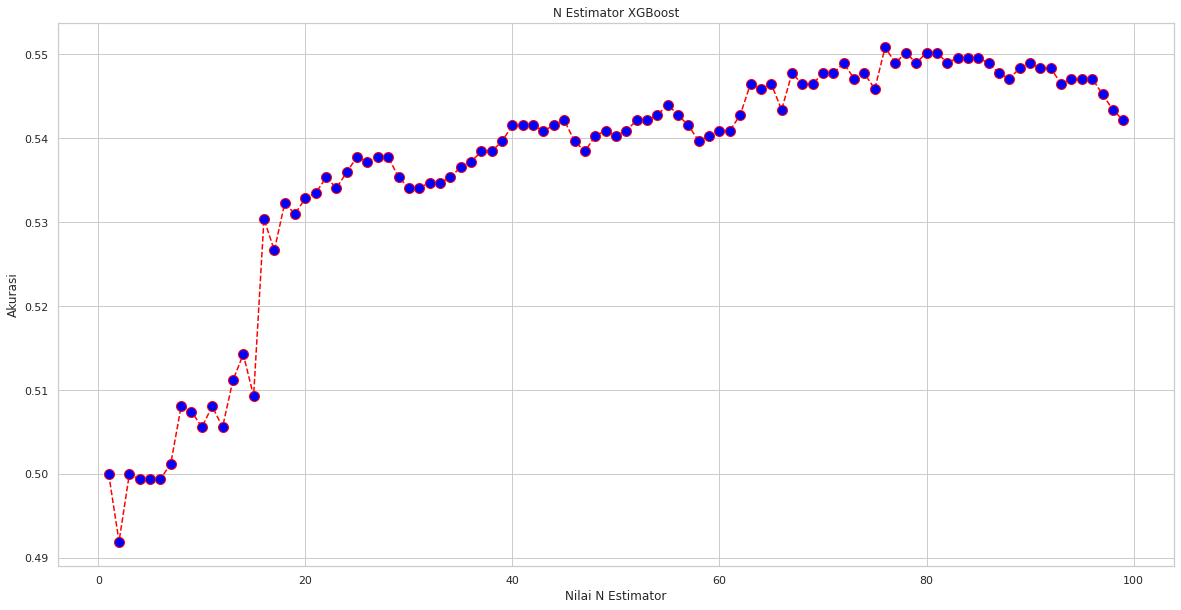

In [ ]:
np.random.seed(10)
acc_nestimator = []

# Calculating accuracy for n_estimator 
for i in range(1,100):  
    np.random.seed(10)
    model = XGBClassifier(random_state=10, n_estimators=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_nestimator.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(range(1, 100), acc_nestimator, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('N Estimator XGBoost')  
plt.xlabel('Nilai N Estimator')  
plt.ylabel('Akurasi')
warnings.filterwarnings("ignore")

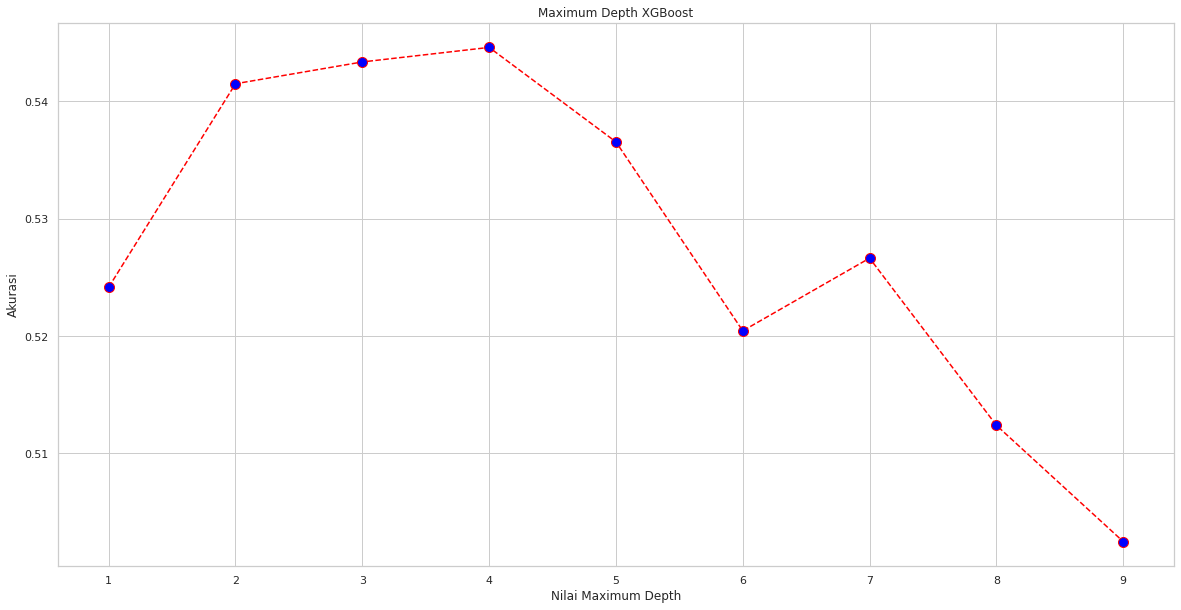

In [ ]:
np.random.seed(10)
acc_maxdepth = []

# Calculating accuracy
for i in range(1,10):  
    np.random.seed(10)
    model = XGBClassifier(random_state=10, max_depth=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_maxdepth.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(range(1, 10), acc_maxdepth, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Maximum Depth XGBoost')  
plt.xlabel('Nilai Maximum Depth')  
plt.ylabel('Akurasi')
warnings.filterwarnings("ignore")

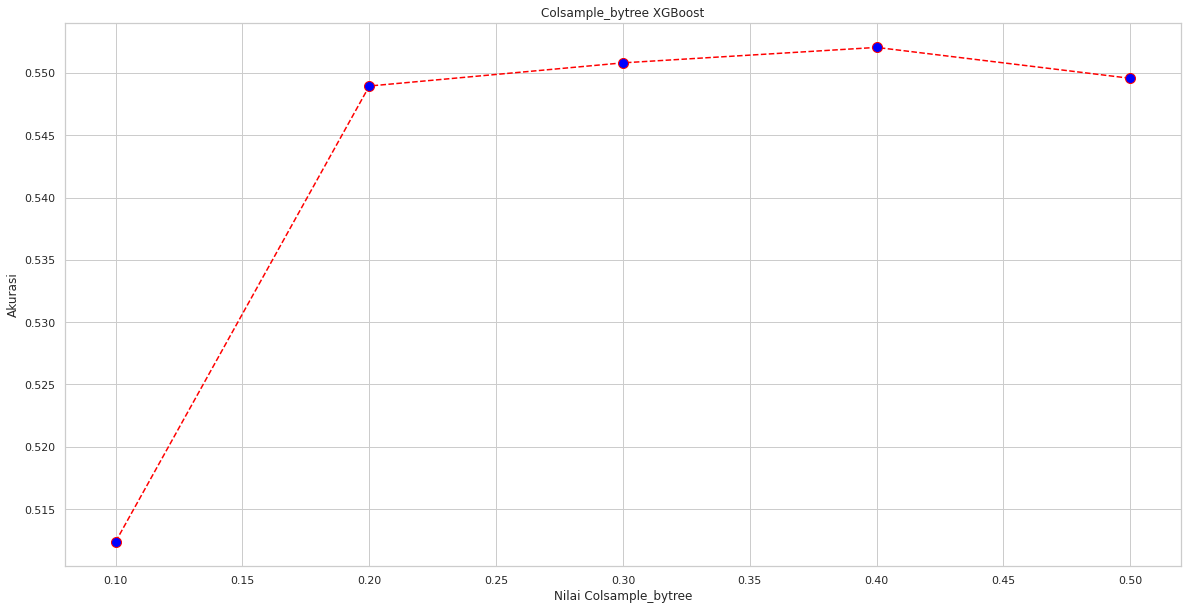

In [ ]:
np.random.seed(10)
acc_colsample = []
colsample = [0.1, 0.2, 0.3, 0.4, 0.5]

# Calculating accuracy
for i in colsample:  
    np.random.seed(10)
    model = XGBClassifier(random_state=10, colsample_bytree=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_colsample.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(colsample, acc_colsample, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Colsample_bytree XGBoost')  
plt.xlabel('Nilai Colsample_bytree')  
plt.ylabel('Akurasi')
warnings.filterwarnings("ignore")

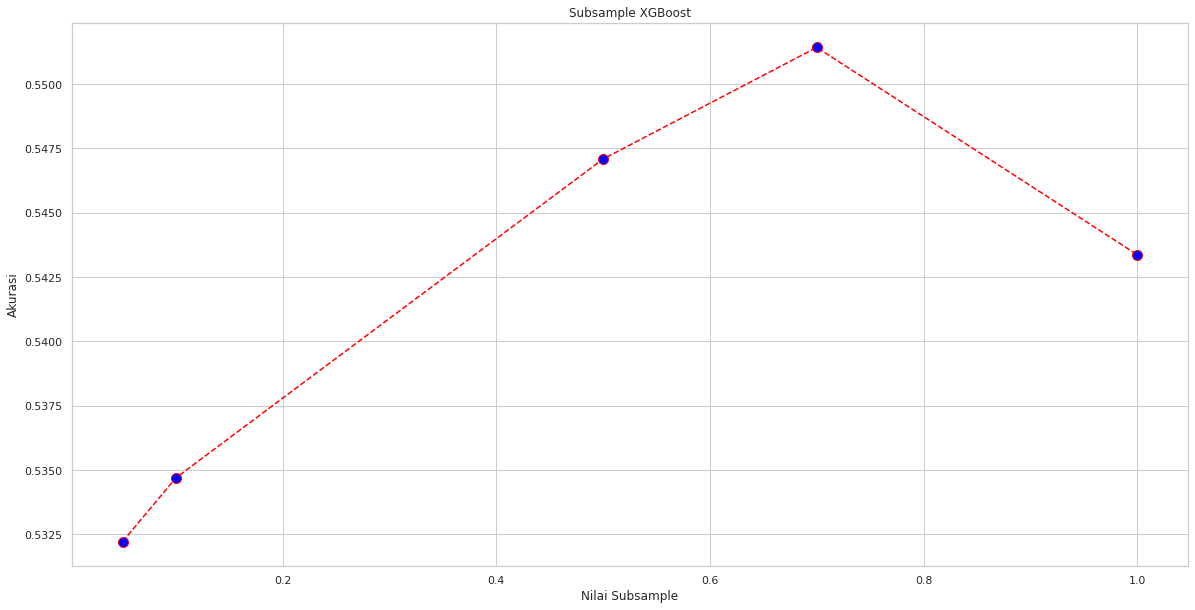

In [ ]:
np.random.seed(10)
acc_subsample = []
subsample = [0.05, 0.1, 0.5, 0.7, 1.0]

# Calculating accuracy
for i in subsample:  
    np.random.seed(10)
    model = XGBClassifier(random_state=10, subsample=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_subsample.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(subsample, acc_subsample, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Subsample XGBoost')  
plt.xlabel('Nilai Subsample')  
plt.ylabel('Akurasi')
warnings.filterwarnings("ignore")

In [ ]:
hyperparametersxg =  {'max_depth':[2,3],
    'min_child_weight': [6,7,8],
    'eta':[.05, .03],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.3, 0.4]} 

print(hyperparametersxg)

{'max_depth': [2, 3], 'min_child_weight': [6, 7, 8], 'eta': [0.05, 0.03], 'subsample': [0.7, 1], 'colsample_bytree': [0.3, 0.4]}


#### Data df

In [ ]:
X_train, X_test, y_train, y_test = splittraintest(df)

In [ ]:
# Inisialisasi Model
np.random.seed(10)
model = XGBClassifier(random_state=10)

xg_grid = GridSearchCV(model, cv=3, param_grid=hyperparametersxg)
best_model = xg_grid.fit(X_train, y_train)
grid_pred = xg_grid.predict(X_test)

print("Best Score : ", round(best_model.best_score_, 2))
print("Best classifier : ", best_model.best_estimator_)
print("Accuracy : ", round(accuracy_score(y_test, grid_pred), 2))
print("Precision : ", round(precision_score(y_test, grid_pred, average='macro'), 2))
print("Recall : ", round(recall_score(y_test, grid_pred, average='macro'), 2))
print("F1 Score : ", round(f1_score(y_test, grid_pred, average='macro'), 2))
print()

Best Score :  0.53
Best classifier :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.05, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)
Accuracy :  0.55
Precision :  0.54
Recall :  0.54
F1 Score :  0.53



#### Data df_fe2

In [ ]:
X_train, X_test, y_train, y_test = splittraintest(df_fe2)

In [ ]:
# Inisialisasi Model
np.random.seed(10)
model = XGBClassifier(random_state=10)

xg_grid = GridSearchCV(model, cv=3, param_grid=hyperparametersxg)
best_model = xg_grid.fit(X_train, y_train)
grid_pred = xg_grid.predict(X_test)

print("Best Score : ", round(best_model.best_score_, 2))
print("Best classifier : ", best_model.best_estimator_)
print("Accuracy : ", round(accuracy_score(y_test, grid_pred), 2))
print("Precision : ", round(precision_score(y_test, grid_pred, average='macro'), 2))
print("Recall : ", round(recall_score(y_test, grid_pred, average='macro'), 2))
print("F1 Score : ", round(f1_score(y_test, grid_pred, average='macro'), 2))
print()

Best Score :  0.52
Best classifier :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.05, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=8, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)
Accuracy :  0.53
Precision :  0.52
Recall :  0.52
F1 Score :  0.52

